In [2]:
import pymongo
import os 
import cv2
import random
import requests
import numpy as np
import json
import csv
import uuid
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
src_folder_1= 'D:\\Test files\\test_1'
src_folder_2= 'D:\\Test files\\test_2'
src_folder_3= 'D:\\Test files\\test_3'
src_folder_4= 'D:\\Test files\\test_4'
src_folder_5= 'D:\\Test files\\test_5'
src_folder_6= 'D:\\Test files\\test_6'
src_folder_7= 'D:\\Test files\\test_7'
src_folder_8= 'D:\\Test files\\test_8'
src_folder_9= 'D:\\Test files\\test_9'
src_folder_10= 'D:\\Test files\\test_10'
src_folder_11= 'D:\\Test files\\test_11'
src_folder_12= 'D:\\Test files\\test_12'
src_folder_13= 'D:\\Test files\\test_13'
src_folder_14= 'D:\\Test files\\test_14'
src_folder_15= 'D:\\Test files\\test_15'
src_folder_16= 'D:\\Test files\\test_16'
src_folder_17= 'D:\\Test files\\test_17'
src_folder_18= 'D:\\Test files\\test_18'
src_folder_19= 'D:\\Test files\\test_19'
src_folder_20= 'D:\\Test files\\test_20'
src_folder_21= 'D:\\Test files\\test_21'
src_folder_22= 'D:\\Test files\\test_22'
src_folder_23= 'D:\\Test files\\test_23'
src_folder_24= 'D:\\Test files\\test_24'
src_folder_25= 'D:\\Test files\\test_25'
src_folder_26= 'D:\\Test files\\test_26'
src_folder_27= 'D:\\Test files\\test_27'
src_folder_28= 'D:\\Test files\\test_28'
src_folder_29= 'D:\\Test files\\test_29'
src_folder_30= 'D:\\Test files\\test_30'
src_folder_31= 'D:\\Test files\\test_31'
src_folder_32= 'D:\\Test files\\test_32'
src_folder_33= 'D:\\Test files\\test_33'
src_folder_34= 'D:\\Test files\\test_34'
src_folder_35= 'D:\\Test files\\test_35'
src_folder_36= 'D:\\Test files\\test_36'
src_folder_37= 'D:\\Test files\\test_37'
src_folder_38= 'D:\\Test files\\test_38'
src_folder_39= 'D:\\Test files\\test_39'
src_folder_40= 'D:\\Test files\\test_40'

# src_folders = [src_folder_1,src_folder_2,src_folder_3,src_folder_4,src_folder_5,src_folder_6,
#             src_folder_7,src_folder_8,src_folder_9,src_folder_10, src_folder_11,src_folder_12,
#             src_folder_13,src_folder_14,src_folder_15,src_folder_16,
#             src_folder_17,src_folder_18,src_folder_19,src_folder_20, src_folder_21,src_folder_22,
#             src_folder_23,src_folder_24,src_folder_25,src_folder_26, src_folder_27,src_folder_28,
#             src_folder_29,src_folder_30, src_folder_31,src_folder_32,src_folder_33,src_folder_34,src_folder_35,
#             src_folder_36,src_folder_37,src_folder_38,src_folder_39,src_folder_40]

src_folders = [src_folder_1,src_folder_2,src_folder_3,src_folder_4,src_folder_5,src_folder_6,
            src_folder_7,src_folder_8,src_folder_9,src_folder_10, src_folder_11,src_folder_12,
            src_folder_13,src_folder_14,src_folder_15,src_folder_16,
            src_folder_17,src_folder_18,src_folder_19,src_folder_20]

In [6]:
client = pymongo.MongoClient('localhost', 27017)
db = client.images
col = db.image_data
label_file = "C:\\Users\\noelp\\OneDrive\\Pictures\\Fairface\\fairface_label_train.csv"
endpoint_1= 'http://localhost:5000/label_method_1'
endpoint_2 = 'http://localhost:5000/label_method_2'
endpoint_3 = 'http://localhost:5000/label_method_3'
endpoint_4 = 'http://localhost:5003/label_method_4'

In [7]:
def find_file(start_dir, filename):
    filename = str(filename+".npy")
    print(filename)
    for root, dirs, files in os.walk(start_dir):
        if filename in files:
            return os.path.join(root, filename)
    return None

In [8]:
def label_images(dir_path, endpoint):
    
    row_count=1
    correct_predictions = 0
    incorrect_predictions = 0
    
    try:
        # Set the directory path
        files = os.listdir(dir_path)
        
        
        for file in files:
            image_name = file[:-4]
            file_path = os.path.join(dir_path, file)
#             print(file_path)
            embedding = np.load(file_path).tolist()


            label_endpoint = endpoint   
            request_obj = {"embedding": embedding}

            # Get clip predicted labels 
            response = requests.post(label_endpoint, json=request_obj)
            # print(response)

            if response.status_code != 200:
                print("Error retrieving labels")

            data = json.loads(response.content)

            labels = data['labels']

            correct_labels= []
            incorrect_labels = []



            filename = "train/"+image_name
#             print(filename)
                
            with open(label_file, 'r') as file:
                reader = csv.reader(file)

                for row in reader: 
                    if filename in row:
#                         print(str(row))
                        correct_labels.extend(row[1:4])

                        count = 0
                        for label in labels:
                            if label not in correct_labels:
                                incorrect_labels.append(label)
                                count += 1

                        incorrect_predictions += count
                        correct_predictions += 3 - count
                        
                        
#                 print(correct_labels)
#                 print(incorrect_labels)

            image = {
                "_id": uuid.uuid4().hex,
                "image_data": filename,
                "embedding": embedding,
                "unverified_labels": "",
                "verified_labels": correct_labels,
                "incorrect_labels": incorrect_labels,
                "requiresVerification": "False"
                }
                
#            print(image)

    #        print(row_count)
            row_count += 1

            col.insert_one(image)

            # Calculate percentages
            total_predictions = correct_predictions + incorrect_predictions
            correct_percentage = (correct_predictions / total_predictions) * 100 if total_predictions else 0
            incorrect_percentage = (incorrect_predictions / total_predictions) * 100 if total_predictions else 0
            
            
#         print(correct_predictions)
#         print(incorrect_predictions)
#         print(correct_percentage)
#         print(incorrect_percentage)
        return correct_predictions, incorrect_predictions, correct_percentage, incorrect_percentage
    
    except Exception as e:
        print("Error:", e)
        return None

In [9]:
def process_images(src_folders, endpoint):
    
    print(src_folders)
    correct_predictions = []
    incorrect_predictions = []
    correct_percentages = []
    incorrect_percentages = []
    
    for folder in src_folders:
        
        cr_predictions, incr_predictions, cr_percentage, incr_percentage =label_images(folder, endpoint)
        correct_predictions.append(cr_predictions)
        incorrect_predictions.append(incr_predictions)
        correct_percentages.append(cr_percentage)
        incorrect_percentages.append(incr_percentage)
#         print(correct_predictions)
        
        
    print(correct_predictions)
    return correct_predictions ,incorrect_predictions, correct_percentages, incorrect_percentages

In [10]:
def clear_data():
    # This code will clear the images.image_data collection
    result = col.delete_many({})
    print(result.deleted_count, " documents deleted")

In [11]:
def get_incorrect(correct_array):
    new_array = []

    for value in correct_array:
       newValue = 600 - value
       new_array.append(newValue)
    
    return new_array
    

In [12]:
def save_data_to_excel(data, file_name, sheetname):
    df = pd.DataFrame(data)
    with pd.ExcelWriter(file_name) as writer:
        df.to_excel(writer, sheet_name=sheetname, index=False)

In [13]:
def print_results(results, fold):
    print("Fold "+str(fold)+" Results")
    print("--------")
    print("Correct Predictions: "+str(results[0]))
    print("--------")
    print("Incorrect Predictions: "+str(results[1]))
    print("--------")
    print("Correct Percentage: "+ str(results[2]))
    print("--------")
    print("Incorrect Percentage: "+ str(results[3]))
    print("--------")
    print("--------")
    print("Fold "+str(fold)+" results: "+ str(results))
    print("--------")

    plot_graph(results[0], results[1], fold)
    

In [14]:
def plot_graph(correct_predictions, incorrect_predictions, fold):
    x= np.array(range(1, len(correct_predictions)+1))
#     x_2 = np.array(range(1, len(incorrect_predictions)+1))
    print(x)
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.xticks(range(0, 22, 2))

    plt.plot(x, correct_predictions, linestyle="-", marker="o", label='Correct Predictions')
    plt.plot(x, incorrect_predictions, linestyle="-", marker="o", label='Incorrect Predictions')
    plt.legend()
    plt.xlabel('Sample')
    plt.ylabel('Number of Predictions')
    plt.show()

In [15]:
def prep_to_save(results):
    
    data = {
        'Correct Predictions': results[0],
        'Incorrect Predictions': results[1],
        'Correct Percentage': results[2],
        'Incorrect Percentage': results[3]
    }

    return data

In [51]:
# Test Method 1 - Origional Labelling method (Dont Be Wrong Method)


reset_endpoint = "http://localhost:5000/"

# FOLD 1

print("FOLD 1 START")

fold_1_src_folders= random.sample(src_folders, len(src_folders))
fold_1_correct_predictions, fold_1_incorrect_predictions, fold_1_correct_percentages, 
fold_1_incorrect_percentages = process_images(fold_1_src_folders, endpoint_1)

print("Correct Predictions: "+str(fold_1_correct_predictions))
print("Incorrect Predictions: "+str(fold_1_incorrect_predictions))
print("Correct Percentages: "+str(fold_1_correct_percentages))
print("Incorrect Percentages: "+str(fold_1_incorrect_percentages))
print("FOLD 1 END")

#END FOLD 1
# FOLD 2
print("FOLD 2 START")
fold_2_src_folders= random.sample(src_folders, len(src_folders))
fold_2_correct_predictions, fold_2_incorrect_predictions, fold_2_correct_percentages, 
fold_2_incorrect_percentages = process_images(fold_2_src_folders, endpoint_1)
print("Correct Predictions: "+str(fold_2_correct_predictions))
print("Incorrect Predictions: "+str(fold_2_incorrect_predictions))
print("Correct Percentages: "+str(fold_2_correct_percentages))
print("Incorrect Percentages: "+str(fold_2_incorrect_percentages))
print("FOLD 2 END")
# END FOLD 2

# FOLD 3
print("FOLD 3 START")
fold_3_src_folders= random.sample(src_folders, len(src_folders))
fold_3_correct_predictions, fold_3_incorrect_predictions, fold_3_correct_percentages, 
fold_3_incorrect_percentages = process_images(fold_3_src_folders, endpoint_1)

print("Correct Predictions: "+str(fold_3_correct_predictions))
print("Incorrect Predictions: "+str(fold_3_incorrect_predictions))
print("Correct Percentages: "+str(fold_3_correct_percentages))
print("Incorrect Percentages: "+str(fold_3_incorrect_percentages))
print("FOLD 3 END")
# END

# FOLD 4

print("FOLD 4 START")
fold_4_src_folders= random.sample(src_folders, len(src_folders))
fold_4_correct_predictions, fold_4_incorrect_predictions, fold_4_correct_percentages, 
fold_4_incorrect_percentages = process_images(fold_4_src_folders, endpoint_1)

print("Correct Predictions: "+str(fold_4_correct_predictions))
print("Incorrect Predictions: "+str(fold_4_incorrect_predictions))
print("Correct Percentages: "+str(fold_4_correct_percentages))
print("Incorrect Percentages: "+str(fold_4_incorrect_percentages))
print("FOLD 4 END")
# END

# FOLD 5

print("FOLD 5 START")
fold_5_src_folders= random.sample(src_folders, len(src_folders))
fold_5_correct_predictions, fold_5_incorrect_predictions, fold_5_correct_percentages, 
fold_5_incorrect_percentages = process_images(fold_5_src_folders, endpoint_1)

print("Correct Predictions: "+str(fold_5_correct_predictions))
print("Incorrect Predictions: "+str(fold_5_incorrect_predictions))
print("Correct Percentages: "+str(fold_5_correct_percentages))
print("Incorrect Percentages: "+str(fold_5_incorrect_percentages))
print("FOLD 5 END")
# END

4000  documents deleted
FOLD 1 START
['D:\\Test files\\test_20', 'D:\\Test files\\test_10', 'D:\\Test files\\test_18', 'D:\\Test files\\test_19', 'D:\\Test files\\test_7', 'D:\\Test files\\test_9', 'D:\\Test files\\test_15', 'D:\\Test files\\test_12', 'D:\\Test files\\test_14', 'D:\\Test files\\test_16', 'D:\\Test files\\test_2', 'D:\\Test files\\test_3', 'D:\\Test files\\test_8', 'D:\\Test files\\test_13', 'D:\\Test files\\test_5', 'D:\\Test files\\test_1', 'D:\\Test files\\test_4', 'D:\\Test files\\test_11', 'D:\\Test files\\test_6', 'D:\\Test files\\test_17']
train/24599.jpg
train/38753.jpg
train/29678.jpg
train/40430.jpg
train/1540.jpg
train/1464.jpg
train/21241.jpg
train/40239.jpg
train/36217.jpg
train/18972.jpg
train/26729.jpg
train/45163.jpg
train/1087.jpg
train/13848.jpg
train/33692.jpg
train/29953.jpg
train/39571.jpg
train/27656.jpg
train/2909.jpg
train/1299.jpg
train/209.jpg
train/20355.jpg
train/39447.jpg
train/26553.jpg
train/28262.jpg
train/38937.jpg
train/11011.jpg
train/

train/12861.jpg
train/3831.jpg
train/27662.jpg
train/16385.jpg
train/36061.jpg
train/39070.jpg
train/39231.jpg
train/41087.jpg
train/39885.jpg
train/29732.jpg
train/42935.jpg
train/18865.jpg
train/38743.jpg
train/22661.jpg
train/36353.jpg
train/38726.jpg
train/24137.jpg
train/2596.jpg
train/28349.jpg
train/30224.jpg
train/12132.jpg
train/28516.jpg
train/1477.jpg
train/43193.jpg
train/19379.jpg
train/37844.jpg
train/10798.jpg
train/11311.jpg
train/19117.jpg
train/16718.jpg
train/31590.jpg
train/37551.jpg
train/11792.jpg
train/19621.jpg
train/33347.jpg
train/14944.jpg
train/43303.jpg
train/17226.jpg
train/25662.jpg
train/22060.jpg
train/25756.jpg
train/20027.jpg
train/14887.jpg
train/26947.jpg
train/24007.jpg
train/4048.jpg
train/32616.jpg
train/18933.jpg
train/31375.jpg
train/12631.jpg
train/35451.jpg
train/1078.jpg
train/33593.jpg
train/27981.jpg
train/25446.jpg
train/21637.jpg
train/29066.jpg
train/33324.jpg
train/18318.jpg
train/36958.jpg
train/15590.jpg
train/19915.jpg
train/3534.jp

train/45069.jpg
train/15138.jpg
train/2855.jpg
train/25991.jpg
train/12251.jpg
train/17362.jpg
train/25732.jpg
[292, 277, 269, 268, 285]
train/29842.jpg
train/25277.jpg
train/40042.jpg
train/17329.jpg
train/41550.jpg
train/29535.jpg
train/2463.jpg
train/30318.jpg
train/29770.jpg
train/37679.jpg
train/184.jpg
train/28398.jpg
train/29172.jpg
train/21921.jpg
train/19456.jpg
train/13158.jpg
train/39133.jpg
train/3814.jpg
train/2364.jpg
train/12389.jpg
train/13542.jpg
train/27177.jpg
train/27575.jpg
train/32380.jpg
train/31619.jpg
train/11403.jpg
train/10323.jpg
train/17160.jpg
train/29552.jpg
train/21905.jpg
train/18739.jpg
train/25358.jpg
train/30469.jpg
train/20245.jpg
train/2616.jpg
train/45425.jpg
train/43790.jpg
train/33632.jpg
train/45195.jpg
train/21286.jpg
train/12056.jpg
train/40987.jpg
train/19983.jpg
train/10723.jpg
train/44639.jpg
train/21066.jpg
train/16979.jpg
train/11280.jpg
train/29311.jpg
train/3811.jpg
train/32045.jpg
train/17881.jpg
train/31323.jpg
train/20611.jpg
train/

train/28241.jpg
train/32849.jpg
train/40345.jpg
train/4161.jpg
train/23957.jpg
train/15079.jpg
train/39197.jpg
train/27790.jpg
train/40322.jpg
train/15678.jpg
train/39929.jpg
train/42367.jpg
train/39290.jpg
train/37357.jpg
train/33760.jpg
train/33497.jpg
train/31535.jpg
train/1955.jpg
train/36165.jpg
train/39437.jpg
train/26900.jpg
train/42761.jpg
train/28431.jpg
train/26030.jpg
train/1624.jpg
train/37108.jpg
train/42126.jpg
train/26192.jpg
train/23278.jpg
train/42629.jpg
train/31601.jpg
train/10107.jpg
train/1028.jpg
train/22299.jpg
train/42167.jpg
train/13128.jpg
train/30708.jpg
train/29999.jpg
train/3762.jpg
train/43654.jpg
train/34308.jpg
train/42968.jpg
train/36507.jpg
train/34400.jpg
train/27603.jpg
train/31727.jpg
train/31093.jpg
train/14419.jpg
train/32744.jpg
train/2191.jpg
train/40939.jpg
train/19707.jpg
train/38843.jpg
train/11095.jpg
train/43292.jpg
train/28864.jpg
train/43669.jpg
train/40816.jpg
train/44681.jpg
train/23438.jpg
train/19266.jpg
train/21547.jpg
train/12101.jp

train/31942.jpg
train/34236.jpg
train/12649.jpg
train/37226.jpg
train/32854.jpg
train/29640.jpg
train/43114.jpg
train/30973.jpg
train/36625.jpg
train/34250.jpg
train/43903.jpg
train/13845.jpg
train/39963.jpg
train/45334.jpg
train/38935.jpg
train/23024.jpg
train/43063.jpg
train/33907.jpg
train/42463.jpg
train/35928.jpg
train/36299.jpg
train/38595.jpg
train/20084.jpg
train/14683.jpg
train/3320.jpg
train/31734.jpg
train/19026.jpg
train/41781.jpg
train/23264.jpg
train/23085.jpg
train/17035.jpg
train/28800.jpg
train/41548.jpg
train/14461.jpg
train/2987.jpg
train/44855.jpg
train/12121.jpg
train/3530.jpg
train/31928.jpg
train/11977.jpg
train/27748.jpg
train/29391.jpg
train/26036.jpg
train/35670.jpg
train/25227.jpg
train/40208.jpg
train/29143.jpg
train/11794.jpg
train/42407.jpg
train/11177.jpg
train/167.jpg
train/23609.jpg
train/21274.jpg
train/29189.jpg
train/43682.jpg
train/39360.jpg
train/23331.jpg
train/35104.jpg
train/11226.jpg
train/36783.jpg
train/16104.jpg
train/29726.jpg
train/35692.j

train/34355.jpg
train/19838.jpg
train/17805.jpg
train/43068.jpg
train/30517.jpg
train/11993.jpg
train/44922.jpg
train/24569.jpg
train/26054.jpg
train/33929.jpg
train/38407.jpg
train/42103.jpg
train/12692.jpg
train/14408.jpg
train/39723.jpg
train/32874.jpg
train/25778.jpg
train/18876.jpg
train/31333.jpg
train/33058.jpg
train/32555.jpg
train/39017.jpg
train/24102.jpg
train/41898.jpg
train/32223.jpg
train/42100.jpg
train/31458.jpg
train/21354.jpg
train/19731.jpg
train/19619.jpg
train/30874.jpg
train/34108.jpg
train/43831.jpg
train/40269.jpg
train/12047.jpg
train/38439.jpg
train/10388.jpg
train/2787.jpg
train/35973.jpg
train/18410.jpg
train/14643.jpg
train/32734.jpg
train/42790.jpg
train/12721.jpg
train/26092.jpg
train/10.jpg
train/24639.jpg
train/3641.jpg
train/32365.jpg
train/21349.jpg
train/22210.jpg
train/33341.jpg
train/17195.jpg
train/23641.jpg
train/45204.jpg
train/27573.jpg
train/34955.jpg
train/2489.jpg
train/36336.jpg
train/44946.jpg
train/17094.jpg
train/44654.jpg
train/25551.jp

train/4210.jpg
train/2277.jpg
train/31416.jpg
train/37560.jpg
train/24128.jpg
train/38199.jpg
train/22061.jpg
train/3261.jpg
train/36214.jpg
train/33710.jpg
train/40172.jpg
train/17839.jpg
train/10207.jpg
train/43805.jpg
train/32018.jpg
train/13366.jpg
train/16483.jpg
train/42588.jpg
train/44118.jpg
train/1561.jpg
train/3113.jpg
train/12284.jpg
train/41313.jpg
train/11633.jpg
train/14791.jpg
train/31360.jpg
train/17888.jpg
train/37745.jpg
train/35282.jpg
train/37538.jpg
train/13469.jpg
train/4419.jpg
train/12453.jpg
train/24760.jpg
train/27196.jpg
train/39965.jpg
train/26288.jpg
train/17293.jpg
train/15049.jpg
train/37972.jpg
train/42794.jpg
train/20042.jpg
train/2357.jpg
train/23515.jpg
train/36623.jpg
train/21692.jpg
train/21837.jpg
train/10191.jpg
train/15660.jpg
train/43089.jpg
train/40874.jpg
train/39406.jpg
train/11293.jpg
train/12484.jpg
train/12480.jpg
train/33931.jpg
train/11643.jpg
train/23305.jpg
train/19645.jpg
train/2739.jpg
train/23261.jpg
train/4496.jpg
train/21126.jpg
t

train/23112.jpg
train/12334.jpg
train/18583.jpg
train/31356.jpg
train/29569.jpg
train/23269.jpg
train/26880.jpg
train/23911.jpg
train/4006.jpg
train/34387.jpg
train/40792.jpg
train/2027.jpg
train/22375.jpg
train/34435.jpg
train/37684.jpg
train/22773.jpg
train/21243.jpg
train/41699.jpg
train/15657.jpg
train/36410.jpg
train/3169.jpg
train/42153.jpg
train/43982.jpg
train/3730.jpg
train/24894.jpg
train/31488.jpg
train/16373.jpg
train/27931.jpg
train/28726.jpg
train/38275.jpg
train/13716.jpg
train/28649.jpg
train/22098.jpg
train/33191.jpg
train/16837.jpg
train/10557.jpg
train/10206.jpg
train/21166.jpg
train/13396.jpg
train/17513.jpg
train/30298.jpg
train/35998.jpg
train/43407.jpg
train/14462.jpg
train/15696.jpg
train/2598.jpg
train/33589.jpg
train/11413.jpg
train/24153.jpg
train/38404.jpg
train/33382.jpg
train/38051.jpg
train/32782.jpg
train/33212.jpg
train/3928.jpg
train/14654.jpg
train/42918.jpg
train/42737.jpg
train/2544.jpg
train/32523.jpg
train/36784.jpg
train/44683.jpg
train/34124.jpg

FOLD 2 START
['D:\\Test files\\test_7', 'D:\\Test files\\test_8', 'D:\\Test files\\test_9', 'D:\\Test files\\test_3', 'D:\\Test files\\test_20', 'D:\\Test files\\test_4', 'D:\\Test files\\test_11', 'D:\\Test files\\test_16', 'D:\\Test files\\test_12', 'D:\\Test files\\test_10', 'D:\\Test files\\test_6', 'D:\\Test files\\test_1', 'D:\\Test files\\test_19', 'D:\\Test files\\test_13', 'D:\\Test files\\test_15', 'D:\\Test files\\test_5', 'D:\\Test files\\test_17', 'D:\\Test files\\test_18', 'D:\\Test files\\test_2', 'D:\\Test files\\test_14']
train/3429.jpg
train/15440.jpg
train/39911.jpg
train/38899.jpg
train/3276.jpg
train/24178.jpg
train/26591.jpg
train/44483.jpg
train/26469.jpg
train/11208.jpg
train/20006.jpg
train/11041.jpg
train/38956.jpg
train/12469.jpg
train/28418.jpg
train/10028.jpg
train/2353.jpg
train/15820.jpg
train/32163.jpg
train/32588.jpg
train/36345.jpg
train/29102.jpg
train/1500.jpg
train/36044.jpg
train/26986.jpg
train/40993.jpg
train/21322.jpg
train/1817.jpg
train/15938.

train/20565.jpg
train/29211.jpg
train/30961.jpg
train/11471.jpg
train/2907.jpg
train/3337.jpg
train/10650.jpg
train/27415.jpg
train/27010.jpg
train/33910.jpg
train/30084.jpg
train/32114.jpg
train/21512.jpg
train/43062.jpg
train/27636.jpg
train/11305.jpg
train/30744.jpg
train/3970.jpg
train/11028.jpg
train/19999.jpg
train/40149.jpg
train/33369.jpg
train/26951.jpg
train/35440.jpg
train/21194.jpg
train/40.jpg
train/31666.jpg
train/15975.jpg
train/41724.jpg
train/17798.jpg
train/18762.jpg
train/11975.jpg
train/25180.jpg
train/39962.jpg
train/30254.jpg
train/37340.jpg
train/29142.jpg
train/20800.jpg
train/28242.jpg
train/34350.jpg
train/45368.jpg
train/17306.jpg
train/3542.jpg
train/24082.jpg
train/1517.jpg
train/2032.jpg
train/38910.jpg
train/37957.jpg
train/27578.jpg
train/42954.jpg
train/26887.jpg
train/18963.jpg
train/36927.jpg
train/17389.jpg
train/381.jpg
train/37458.jpg
train/32176.jpg
train/32425.jpg
train/30490.jpg
train/39029.jpg
train/19822.jpg
train/27388.jpg
train/15506.jpg
tra

train/18130.jpg
train/42750.jpg
train/10505.jpg
train/35470.jpg
[291, 264, 292, 294, 302]
train/37044.jpg
train/17659.jpg
train/1790.jpg
train/34590.jpg
train/25575.jpg
train/40971.jpg
train/15631.jpg
train/13273.jpg
train/18283.jpg
train/12509.jpg
train/20487.jpg
train/27367.jpg
train/15541.jpg
train/14112.jpg
train/27477.jpg
train/32505.jpg
train/15424.jpg
train/32366.jpg
train/26282.jpg
train/31028.jpg
train/12565.jpg
train/27068.jpg
train/21553.jpg
train/35357.jpg
train/38354.jpg
train/44084.jpg
train/31463.jpg
train/38547.jpg
train/29793.jpg
train/15274.jpg
train/10374.jpg
train/10805.jpg
train/30488.jpg
train/44751.jpg
train/3086.jpg
train/15008.jpg
train/24457.jpg
train/43234.jpg
train/20699.jpg
train/39533.jpg
train/21935.jpg
train/31815.jpg
train/43066.jpg
train/31324.jpg
train/35735.jpg
train/20036.jpg
train/33882.jpg
train/24540.jpg
train/39046.jpg
train/26119.jpg
train/26185.jpg
train/19779.jpg
train/21800.jpg
train/39100.jpg
train/19297.jpg
train/26099.jpg
train/11866.jpg


train/27086.jpg
train/35230.jpg
train/43503.jpg
train/36004.jpg
train/28718.jpg
train/26205.jpg
train/38803.jpg
train/24668.jpg
train/36451.jpg
train/1371.jpg
train/39386.jpg
train/22682.jpg
train/19467.jpg
train/1384.jpg
train/41514.jpg
train/39739.jpg
train/36741.jpg
train/19610.jpg
train/25686.jpg
train/10937.jpg
train/36362.jpg
train/16349.jpg
train/2129.jpg
train/14067.jpg
train/18084.jpg
train/25558.jpg
train/21838.jpg
train/22777.jpg
train/34956.jpg
train/10490.jpg
train/20681.jpg
train/38754.jpg
train/30598.jpg
train/29909.jpg
train/10278.jpg
train/3076.jpg
train/39630.jpg
train/15410.jpg
train/16993.jpg
train/16308.jpg
train/34715.jpg
train/19291.jpg
train/44905.jpg
train/14868.jpg
train/30722.jpg
train/32813.jpg
train/3646.jpg
train/30783.jpg
train/33349.jpg
train/40491.jpg
train/27647.jpg
train/35583.jpg
train/43247.jpg
train/21602.jpg
train/21980.jpg
train/19850.jpg
train/40762.jpg
train/43246.jpg
train/39195.jpg
train/19969.jpg
train/4533.jpg
train/21657.jpg
train/367.jpg


train/34605.jpg
train/35537.jpg
train/1410.jpg
train/29007.jpg
train/14228.jpg
train/1174.jpg
train/37712.jpg
train/42362.jpg
train/44677.jpg
train/11454.jpg
train/44640.jpg
train/21176.jpg
train/37004.jpg
train/1241.jpg
train/32828.jpg
train/12252.jpg
train/138.jpg
train/2831.jpg
train/29002.jpg
train/22696.jpg
train/16594.jpg
train/17484.jpg
train/34371.jpg
train/41608.jpg
train/40271.jpg
train/44356.jpg
train/31337.jpg
train/22181.jpg
train/3439.jpg
train/34173.jpg
train/41509.jpg
train/11372.jpg
train/28636.jpg
train/33563.jpg
train/29018.jpg
train/33134.jpg
train/11587.jpg
train/39023.jpg
train/24130.jpg
train/35312.jpg
train/14489.jpg
train/14209.jpg
train/28371.jpg
train/36081.jpg
train/31717.jpg
train/45176.jpg
train/3707.jpg
train/14511.jpg
train/36162.jpg
train/11666.jpg
train/27502.jpg
train/33622.jpg
train/18688.jpg
train/18921.jpg
train/24383.jpg
train/26611.jpg
train/4312.jpg
train/36301.jpg
train/38939.jpg
train/22903.jpg
train/14616.jpg
train/16752.jpg
train/18291.jpg
t

train/17365.jpg
train/34111.jpg
train/16586.jpg
train/2704.jpg
train/39880.jpg
train/24173.jpg
train/3307.jpg
train/28279.jpg
train/17843.jpg
train/40514.jpg
train/19717.jpg
train/18950.jpg
train/29114.jpg
train/23109.jpg
train/24825.jpg
train/39970.jpg
train/38776.jpg
train/13713.jpg
train/385.jpg
train/30234.jpg
train/26031.jpg
train/1984.jpg
train/35499.jpg
train/22578.jpg
train/44699.jpg
train/42644.jpg
train/33947.jpg
train/35845.jpg
train/21459.jpg
train/15648.jpg
train/25896.jpg
train/1617.jpg
train/25350.jpg
train/3608.jpg
train/1916.jpg
train/12625.jpg
train/24061.jpg
train/3826.jpg
train/10429.jpg
train/32639.jpg
train/37930.jpg
train/37066.jpg
train/30226.jpg
train/22914.jpg
train/30374.jpg
train/41511.jpg
train/37616.jpg
train/36734.jpg
train/22121.jpg
train/2731.jpg
train/3998.jpg
train/30320.jpg
train/31367.jpg
train/31851.jpg
train/44020.jpg
train/14718.jpg
train/44726.jpg
train/34810.jpg
train/19373.jpg
train/2173.jpg
train/22408.jpg
train/15585.jpg
train/10208.jpg
trai

train/41922.jpg
train/38897.jpg
train/29028.jpg
train/34468.jpg
train/11699.jpg
train/23669.jpg
train/17777.jpg
train/15818.jpg
train/16153.jpg
train/13844.jpg
train/34585.jpg
train/42143.jpg
train/38561.jpg
train/16826.jpg
train/37337.jpg
train/32356.jpg
train/34530.jpg
train/23166.jpg
train/35272.jpg
train/33456.jpg
train/44275.jpg
train/33276.jpg
train/20398.jpg
train/1406.jpg
train/11169.jpg
train/16294.jpg
train/2567.jpg
train/36738.jpg
train/19855.jpg
train/31732.jpg
train/36604.jpg
train/37255.jpg
train/16286.jpg
train/37028.jpg
train/37166.jpg
train/3869.jpg
train/39286.jpg
train/40190.jpg
train/43252.jpg
train/27140.jpg
train/11627.jpg
train/29090.jpg
train/19124.jpg
train/39233.jpg
train/12908.jpg
train/2732.jpg
train/21961.jpg
train/19659.jpg
train/37408.jpg
train/12491.jpg
train/20183.jpg
train/2723.jpg
train/11059.jpg
train/23368.jpg
train/30006.jpg
train/45389.jpg
train/1908.jpg
train/20596.jpg
train/15309.jpg
train/15507.jpg
train/12036.jpg
train/26978.jpg
train/25832.jp

train/1078.jpg
train/33593.jpg
train/27981.jpg
train/25446.jpg
train/21637.jpg
train/29066.jpg
train/33324.jpg
train/18318.jpg
train/36958.jpg
train/15590.jpg
train/19915.jpg
train/3534.jpg
train/11740.jpg
train/32696.jpg
train/4450.jpg
train/14997.jpg
train/39711.jpg
train/37335.jpg
train/37574.jpg
train/43841.jpg
train/1003.jpg
train/24615.jpg
train/23687.jpg
train/19292.jpg
train/25727.jpg
train/33289.jpg
train/10533.jpg
train/12644.jpg
train/44164.jpg
train/22250.jpg
train/1261.jpg
train/11843.jpg
train/34489.jpg
train/14502.jpg
train/2695.jpg
train/32778.jpg
train/42340.jpg
train/20649.jpg
train/22385.jpg
train/30970.jpg
train/44967.jpg
train/30459.jpg
train/1199.jpg
train/25856.jpg
train/39075.jpg
train/18966.jpg
train/19979.jpg
train/44072.jpg
train/12144.jpg
train/34761.jpg
train/31390.jpg
train/1196.jpg
train/30839.jpg
train/19411.jpg
train/14033.jpg
train/26032.jpg
train/38716.jpg
train/32025.jpg
train/28248.jpg
train/32675.jpg
train/24978.jpg
train/11973.jpg
train/30394.jpg


FOLD 3 START
['D:\\Test files\\test_8', 'D:\\Test files\\test_11', 'D:\\Test files\\test_6', 'D:\\Test files\\test_16', 'D:\\Test files\\test_15', 'D:\\Test files\\test_20', 'D:\\Test files\\test_1', 'D:\\Test files\\test_4', 'D:\\Test files\\test_7', 'D:\\Test files\\test_2', 'D:\\Test files\\test_5', 'D:\\Test files\\test_13', 'D:\\Test files\\test_3', 'D:\\Test files\\test_18', 'D:\\Test files\\test_19', 'D:\\Test files\\test_12', 'D:\\Test files\\test_14', 'D:\\Test files\\test_10', 'D:\\Test files\\test_9', 'D:\\Test files\\test_17']
train/20677.jpg
train/22513.jpg
train/31186.jpg
train/2606.jpg
train/34020.jpg
train/10836.jpg
train/1920.jpg
train/41997.jpg
train/2781.jpg
train/32942.jpg
train/21221.jpg
train/22145.jpg
train/17046.jpg
train/20091.jpg
train/42630.jpg
train/28977.jpg
train/17015.jpg
train/23767.jpg
train/39484.jpg
train/34076.jpg
train/22708.jpg
train/44286.jpg
train/36392.jpg
train/15523.jpg
train/18394.jpg
train/4510.jpg
train/17865.jpg
train/44933.jpg
train/38057

train/16827.jpg
train/41010.jpg
train/43301.jpg
train/43405.jpg
train/4395.jpg
train/38292.jpg
train/22743.jpg
train/21578.jpg
train/15739.jpg
train/30583.jpg
train/34544.jpg
train/33242.jpg
train/20110.jpg
train/44520.jpg
train/43822.jpg
train/28723.jpg
train/34968.jpg
train/23576.jpg
train/40742.jpg
train/27055.jpg
train/18409.jpg
train/15766.jpg
train/27362.jpg
train/15547.jpg
train/17142.jpg
train/34105.jpg
train/45085.jpg
train/12392.jpg
train/39844.jpg
train/2034.jpg
train/42773.jpg
train/19289.jpg
train/10201.jpg
train/16804.jpg
train/13019.jpg
train/36541.jpg
train/40825.jpg
train/45215.jpg
train/28461.jpg
train/13169.jpg
train/44989.jpg
train/18763.jpg
train/24331.jpg
train/37064.jpg
train/37361.jpg
train/36999.jpg
train/12445.jpg
train/19046.jpg
train/16407.jpg
train/15398.jpg
train/20488.jpg
train/17757.jpg
train/44325.jpg
train/17050.jpg
train/4224.jpg
train/3688.jpg
train/16075.jpg
train/43649.jpg
train/28595.jpg
train/17225.jpg
train/40300.jpg
train/19491.jpg
train/18978.

train/10950.jpg
train/25390.jpg
train/27605.jpg
train/40227.jpg
train/40095.jpg
train/44695.jpg
[262, 269, 281, 264, 296]
train/24599.jpg
train/38753.jpg
train/29678.jpg
train/40430.jpg
train/1540.jpg
train/1464.jpg
train/21241.jpg
train/40239.jpg
train/36217.jpg
train/18972.jpg
train/26729.jpg
train/45163.jpg
train/1087.jpg
train/13848.jpg
train/33692.jpg
train/29953.jpg
train/39571.jpg
train/27656.jpg
train/2909.jpg
train/1299.jpg
train/209.jpg
train/20355.jpg
train/39447.jpg
train/26553.jpg
train/28262.jpg
train/38937.jpg
train/11011.jpg
train/38949.jpg
train/4100.jpg
train/337.jpg
train/16977.jpg
train/23075.jpg
train/37791.jpg
train/44046.jpg
train/44353.jpg
train/42597.jpg
train/1588.jpg
train/28812.jpg
train/37443.jpg
train/43534.jpg
train/44980.jpg
train/44328.jpg
train/21982.jpg
train/20426.jpg
train/2621.jpg
train/173.jpg
train/39950.jpg
train/31459.jpg
train/24776.jpg
train/3984.jpg
train/21624.jpg
train/34770.jpg
train/34555.jpg
train/36323.jpg
train/37926.jpg
train/42695.j

train/32003.jpg
train/26023.jpg
train/26249.jpg
train/39289.jpg
train/17807.jpg
train/33740.jpg
train/118.jpg
train/11731.jpg
train/37009.jpg
train/30160.jpg
train/43680.jpg
train/24027.jpg
train/24158.jpg
train/29336.jpg
train/44310.jpg
train/35381.jpg
train/22711.jpg
train/38.jpg
train/10111.jpg
train/42866.jpg
train/17231.jpg
train/26687.jpg
train/4384.jpg
train/10616.jpg
train/21348.jpg
train/39349.jpg
train/1581.jpg
train/18879.jpg
train/19699.jpg
train/12025.jpg
train/41034.jpg
train/33775.jpg
train/14281.jpg
train/36967.jpg
train/34003.jpg
train/34392.jpg
train/42482.jpg
train/14389.jpg
train/44272.jpg
train/12181.jpg
train/14579.jpg
train/11528.jpg
train/16247.jpg
train/34922.jpg
train/23455.jpg
train/18485.jpg
train/25793.jpg
train/41292.jpg
train/29795.jpg
train/29415.jpg
train/4188.jpg
train/37519.jpg
train/37770.jpg
train/22529.jpg
train/22189.jpg
train/35118.jpg
train/38400.jpg
train/10065.jpg
train/27756.jpg
train/14471.jpg
train/17796.jpg
train/36739.jpg
train/34131.jpg


train/31457.jpg
train/41698.jpg
train/41526.jpg
train/40898.jpg
train/28018.jpg
train/12883.jpg
train/38705.jpg
train/29422.jpg
train/38798.jpg
train/29559.jpg
train/2776.jpg
train/42487.jpg
train/27190.jpg
train/41922.jpg
train/38897.jpg
train/29028.jpg
train/34468.jpg
train/11699.jpg
train/23669.jpg
train/17777.jpg
train/15818.jpg
train/16153.jpg
train/13844.jpg
train/34585.jpg
train/42143.jpg
train/38561.jpg
train/16826.jpg
train/37337.jpg
train/32356.jpg
train/34530.jpg
train/23166.jpg
train/35272.jpg
train/33456.jpg
train/44275.jpg
train/33276.jpg
train/20398.jpg
train/1406.jpg
train/11169.jpg
train/16294.jpg
train/2567.jpg
train/36738.jpg
train/19855.jpg
train/31732.jpg
train/36604.jpg
train/37255.jpg
train/16286.jpg
train/37028.jpg
train/37166.jpg
train/3869.jpg
train/39286.jpg
train/40190.jpg
train/43252.jpg
train/27140.jpg
train/11627.jpg
train/29090.jpg
train/19124.jpg
train/39233.jpg
train/12908.jpg
train/2732.jpg
train/21961.jpg
train/19659.jpg
train/37408.jpg
train/12491.j

train/33825.jpg
train/27426.jpg
train/42846.jpg
train/28742.jpg
train/44805.jpg
train/42146.jpg
train/2498.jpg
train/44260.jpg
train/21782.jpg
train/28943.jpg
train/34335.jpg
train/3571.jpg
train/28586.jpg
train/17819.jpg
train/39468.jpg
train/20823.jpg
train/35215.jpg
train/20378.jpg
train/35445.jpg
train/43239.jpg
train/40329.jpg
train/21573.jpg
train/14400.jpg
train/18168.jpg
train/40122.jpg
train/2663.jpg
train/3366.jpg
train/22041.jpg
train/21797.jpg
train/39709.jpg
train/12162.jpg
train/14237.jpg
train/19221.jpg
train/21951.jpg
train/30433.jpg
train/16403.jpg
train/29437.jpg
train/40154.jpg
train/22607.jpg
train/20789.jpg
train/41779.jpg
train/42798.jpg
train/29460.jpg
train/23226.jpg
train/39059.jpg
train/22520.jpg
train/38826.jpg
train/2944.jpg
train/34658.jpg
train/44163.jpg
train/16340.jpg
train/16115.jpg
train/26749.jpg
train/11019.jpg
train/31557.jpg
train/42555.jpg
train/43671.jpg
train/19368.jpg
train/21499.jpg
train/43525.jpg
train/26481.jpg
train/21208.jpg
train/44873.j

train/12554.jpg
train/35299.jpg
train/31387.jpg
train/1144.jpg
train/36955.jpg
train/2441.jpg
train/31706.jpg
train/42461.jpg
train/39172.jpg
train/12610.jpg
train/23875.jpg
train/14911.jpg
train/41058.jpg
train/23229.jpg
train/23831.jpg
train/20913.jpg
train/29365.jpg
train/14846.jpg
train/1129.jpg
train/29174.jpg
train/12363.jpg
train/4432.jpg
train/1222.jpg
train/15736.jpg
train/34550.jpg
train/23933.jpg
train/21814.jpg
train/18383.jpg
train/30902.jpg
train/43535.jpg
train/30297.jpg
train/12240.jpg
train/42523.jpg
train/3477.jpg
train/1203.jpg
train/38677.jpg
train/34357.jpg
train/4393.jpg
train/19060.jpg
train/27967.jpg
train/32722.jpg
train/19071.jpg
train/36737.jpg
train/31674.jpg
train/36008.jpg
train/32758.jpg
train/39626.jpg
train/22835.jpg
train/43715.jpg
train/37347.jpg
train/16861.jpg
train/30342.jpg
train/28786.jpg
train/28894.jpg
train/2166.jpg
train/40166.jpg
train/39145.jpg
train/32941.jpg
train/17723.jpg
train/36176.jpg
train/42797.jpg
train/2747.jpg
train/10127.jpg
tr

train/40956.jpg
train/3304.jpg
train/15207.jpg
train/36116.jpg
train/27563.jpg
train/22559.jpg
train/23655.jpg
train/29809.jpg
train/31930.jpg
train/38811.jpg
train/17992.jpg
train/28162.jpg
train/17660.jpg
train/26041.jpg
train/45379.jpg
train/42277.jpg
train/21460.jpg
train/14245.jpg
train/19530.jpg
train/28746.jpg
train/2391.jpg
train/22314.jpg
train/21040.jpg
train/13809.jpg
train/18615.jpg
train/15987.jpg
train/42843.jpg
train/2758.jpg
train/4323.jpg
train/37824.jpg
train/26617.jpg
train/12620.jpg
train/32671.jpg
train/28542.jpg
train/13897.jpg
train/18888.jpg
train/31099.jpg
train/1326.jpg
train/13736.jpg
train/12896.jpg
train/10117.jpg
train/41949.jpg
train/29149.jpg
train/13757.jpg
train/34155.jpg
train/41270.jpg
train/1123.jpg
train/13260.jpg
train/35279.jpg
train/36163.jpg
train/12237.jpg
train/26513.jpg
train/19495.jpg
train/20170.jpg
train/35122.jpg
train/42250.jpg
train/42316.jpg
train/17799.jpg
train/24087.jpg
train/31482.jpg
train/30266.jpg
train/22575.jpg
train/28911.jp

4000  documents deleted
FOLD 4 START
['D:\\Test files\\test_9', 'D:\\Test files\\test_6', 'D:\\Test files\\test_10', 'D:\\Test files\\test_2', 'D:\\Test files\\test_7', 'D:\\Test files\\test_14', 'D:\\Test files\\test_17', 'D:\\Test files\\test_1', 'D:\\Test files\\test_4', 'D:\\Test files\\test_15', 'D:\\Test files\\test_11', 'D:\\Test files\\test_12', 'D:\\Test files\\test_20', 'D:\\Test files\\test_18', 'D:\\Test files\\test_13', 'D:\\Test files\\test_16', 'D:\\Test files\\test_8', 'D:\\Test files\\test_19', 'D:\\Test files\\test_3', 'D:\\Test files\\test_5']
train/29842.jpg
train/25277.jpg
train/40042.jpg
train/17329.jpg
train/41550.jpg
train/29535.jpg
train/2463.jpg
train/30318.jpg
train/29770.jpg
train/37679.jpg
train/184.jpg
train/28398.jpg
train/29172.jpg
train/21921.jpg
train/19456.jpg
train/13158.jpg
train/39133.jpg
train/3814.jpg
train/2364.jpg
train/12389.jpg
train/13542.jpg
train/27177.jpg
train/27575.jpg
train/32380.jpg
train/31619.jpg
train/11403.jpg
train/10323.jpg
trai

train/41961.jpg
train/37568.jpg
train/15663.jpg
train/36308.jpg
train/26004.jpg
train/33699.jpg
train/13749.jpg
train/35906.jpg
train/43947.jpg
train/34993.jpg
train/20235.jpg
train/40879.jpg
train/16973.jpg
train/33596.jpg
train/1466.jpg
train/30856.jpg
train/14225.jpg
train/25393.jpg
train/23562.jpg
train/29125.jpg
train/26432.jpg
train/31336.jpg
train/42091.jpg
train/29009.jpg
train/44804.jpg
train/32649.jpg
train/27263.jpg
train/1863.jpg
train/4211.jpg
train/40497.jpg
train/45125.jpg
train/30205.jpg
train/26532.jpg
train/33756.jpg
train/41969.jpg
train/33042.jpg
train/18859.jpg
train/40710.jpg
train/19734.jpg
train/38965.jpg
train/20668.jpg
train/18345.jpg
train/37049.jpg
train/15960.jpg
train/45388.jpg
train/43892.jpg
train/3751.jpg
train/13997.jpg
train/36641.jpg
train/40956.jpg
train/3304.jpg
train/15207.jpg
train/36116.jpg
train/27563.jpg
train/22559.jpg
train/23655.jpg
train/29809.jpg
train/31930.jpg
train/38811.jpg
train/17992.jpg
train/28162.jpg
train/17660.jpg
train/26041.j

train/45069.jpg
train/15138.jpg
train/2855.jpg
train/25991.jpg
train/12251.jpg
train/17362.jpg
train/25732.jpg
[303, 295, 282, 290, 285]
train/10109.jpg
train/38525.jpg
train/38071.jpg
train/24744.jpg
train/3705.jpg
train/41154.jpg
train/36595.jpg
train/34054.jpg
train/15414.jpg
train/27735.jpg
train/24508.jpg
train/23379.jpg
train/24624.jpg
train/45353.jpg
train/10293.jpg
train/20420.jpg
train/23713.jpg
train/33378.jpg
train/29821.jpg
train/32157.jpg
train/27933.jpg
train/24742.jpg
train/15078.jpg
train/33828.jpg
train/3803.jpg
train/1686.jpg
train/289.jpg
train/25328.jpg
train/27851.jpg
train/17616.jpg
train/13083.jpg
train/32243.jpg
train/22473.jpg
train/44628.jpg
train/28714.jpg
train/3601.jpg
train/12720.jpg
train/22154.jpg
train/21802.jpg
train/28197.jpg
train/20744.jpg
train/29954.jpg
train/39812.jpg
train/21851.jpg
train/29276.jpg
train/21048.jpg
train/13183.jpg
train/4043.jpg
train/12487.jpg
train/40972.jpg
train/32662.jpg
train/22430.jpg
train/27544.jpg
train/43844.jpg
train/

train/11545.jpg
train/33139.jpg
train/39167.jpg
train/4189.jpg
train/3012.jpg
train/19528.jpg
train/27529.jpg
train/4444.jpg
train/42304.jpg
train/18577.jpg
train/3677.jpg
train/40288.jpg
train/26525.jpg
train/10384.jpg
train/28557.jpg
train/35698.jpg
train/26684.jpg
train/40411.jpg
train/17197.jpg
train/16307.jpg
train/26042.jpg
train/17897.jpg
train/31804.jpg
train/16930.jpg
train/41732.jpg
train/34156.jpg
train/34207.jpg
train/30947.jpg
train/42879.jpg
train/10056.jpg
train/31774.jpg
train/32584.jpg
train/4357.jpg
train/27496.jpg
train/37394.jpg
train/18627.jpg
train/39115.jpg
train/16140.jpg
train/22244.jpg
train/30063.jpg
train/16643.jpg
train/13034.jpg
train/31825.jpg
train/26361.jpg
train/38013.jpg
train/17643.jpg
train/32129.jpg
train/20076.jpg
train/31501.jpg
train/34667.jpg
train/37097.jpg
train/26623.jpg
train/23300.jpg
train/16222.jpg
train/33996.jpg
train/15803.jpg
train/27773.jpg
train/15822.jpg
train/33141.jpg
train/24113.jpg
train/43528.jpg
train/41480.jpg
train/19545.j

train/12665.jpg
train/41083.jpg
train/34930.jpg
train/37805.jpg
train/13639.jpg
train/24605.jpg
train/3024.jpg
train/40232.jpg
train/41027.jpg
train/14069.jpg
train/25609.jpg
train/43260.jpg
train/24958.jpg
train/16227.jpg
train/33056.jpg
train/37995.jpg
train/10310.jpg
train/19189.jpg
train/20067.jpg
train/22092.jpg
train/1697.jpg
train/18149.jpg
train/12679.jpg
train/11752.jpg
train/40435.jpg
train/12038.jpg
train/21577.jpg
train/45396.jpg
train/22663.jpg
train/29389.jpg
train/2586.jpg
train/1046.jpg
train/2862.jpg
train/28129.jpg
train/22027.jpg
train/27245.jpg
train/1763.jpg
train/13646.jpg
train/32916.jpg
train/2599.jpg
train/22031.jpg
train/39578.jpg
train/19738.jpg
train/20938.jpg
train/36382.jpg
train/35869.jpg
train/23475.jpg
train/43657.jpg
train/3785.jpg
train/28396.jpg
train/41798.jpg
train/26155.jpg
train/38502.jpg
train/31838.jpg
train/35979.jpg
train/39431.jpg
train/18634.jpg
train/23445.jpg
train/24724.jpg
train/16701.jpg
train/36648.jpg
train/40679.jpg
train/32992.jpg


train/11264.jpg
train/13285.jpg
train/10330.jpg
train/26142.jpg
train/33380.jpg
train/44283.jpg
train/24268.jpg
train/37054.jpg
train/17554.jpg
train/11467.jpg
train/11302.jpg
train/29361.jpg
train/16642.jpg
train/35332.jpg
train/18192.jpg
train/14639.jpg
train/13957.jpg
train/13698.jpg
train/39171.jpg
train/21031.jpg
train/31308.jpg
train/22014.jpg
train/23312.jpg
train/44789.jpg
train/37465.jpg
train/3059.jpg
train/41227.jpg
train/24718.jpg
train/3021.jpg
train/20412.jpg
train/35261.jpg
train/38660.jpg
train/38631.jpg
train/26758.jpg
train/28646.jpg
train/43100.jpg
train/35925.jpg
train/40851.jpg
train/21016.jpg
train/14865.jpg
train/11534.jpg
train/42371.jpg
train/31191.jpg
train/32015.jpg
train/4290.jpg
train/11777.jpg
train/41104.jpg
train/30623.jpg
train/11046.jpg
train/13267.jpg
train/26634.jpg
train/17781.jpg
train/42031.jpg
train/29431.jpg
train/10572.jpg
train/2688.jpg
train/20343.jpg
train/41049.jpg
train/26707.jpg
train/1268.jpg
train/13239.jpg
train/38249.jpg
train/20494.j

train/1594.jpg
train/19787.jpg
train/16897.jpg
train/25139.jpg
train/34037.jpg
train/36764.jpg
train/17957.jpg
train/24889.jpg
train/31871.jpg
train/25657.jpg
train/40031.jpg
train/39874.jpg
train/37466.jpg
train/41274.jpg
train/15387.jpg
train/22669.jpg
train/38428.jpg
train/33284.jpg
train/38814.jpg
train/18455.jpg
train/16730.jpg
train/22433.jpg
train/13988.jpg
train/25689.jpg
train/2847.jpg
train/18757.jpg
train/34218.jpg
train/31101.jpg
train/14710.jpg
train/1276.jpg
train/30742.jpg
train/38366.jpg
train/25680.jpg
train/27227.jpg
train/26451.jpg
train/3827.jpg
train/44515.jpg
train/23400.jpg
train/19194.jpg
train/27746.jpg
train/32930.jpg
train/39674.jpg
train/1205.jpg
train/17951.jpg
train/31821.jpg
train/39390.jpg
train/25584.jpg
train/11056.jpg
train/18619.jpg
train/29523.jpg
train/38097.jpg
train/35732.jpg
train/15481.jpg
train/1591.jpg
train/29134.jpg
train/39653.jpg
train/37326.jpg
train/33576.jpg
train/10740.jpg
train/39794.jpg
train/45146.jpg
train/15371.jpg
train/20564.jp

train/28279.jpg
train/17843.jpg
train/40514.jpg
train/19717.jpg
train/18950.jpg
train/29114.jpg
train/23109.jpg
train/24825.jpg
train/39970.jpg
train/38776.jpg
train/13713.jpg
train/385.jpg
train/30234.jpg
train/26031.jpg
train/1984.jpg
train/35499.jpg
train/22578.jpg
train/44699.jpg
train/42644.jpg
train/33947.jpg
train/35845.jpg
train/21459.jpg
train/15648.jpg
train/25896.jpg
train/1617.jpg
train/25350.jpg
train/3608.jpg
train/1916.jpg
train/12625.jpg
train/24061.jpg
train/3826.jpg
train/10429.jpg
train/32639.jpg
train/37930.jpg
train/37066.jpg
train/30226.jpg
train/22914.jpg
train/30374.jpg
train/41511.jpg
train/37616.jpg
train/36734.jpg
train/22121.jpg
train/2731.jpg
train/3998.jpg
train/30320.jpg
train/31367.jpg
train/31851.jpg
train/44020.jpg
train/14718.jpg
train/44726.jpg
train/34810.jpg
train/19373.jpg
train/2173.jpg
train/22408.jpg
train/15585.jpg
train/10208.jpg
train/36480.jpg
train/2352.jpg
train/1446.jpg
train/21568.jpg
train/18539.jpg
train/3859.jpg
train/3634.jpg
train/

FOLD 5 START
['D:\\Test files\\test_19', 'D:\\Test files\\test_3', 'D:\\Test files\\test_17', 'D:\\Test files\\test_2', 'D:\\Test files\\test_12', 'D:\\Test files\\test_5', 'D:\\Test files\\test_15', 'D:\\Test files\\test_20', 'D:\\Test files\\test_6', 'D:\\Test files\\test_16', 'D:\\Test files\\test_7', 'D:\\Test files\\test_4', 'D:\\Test files\\test_11', 'D:\\Test files\\test_13', 'D:\\Test files\\test_9', 'D:\\Test files\\test_8', 'D:\\Test files\\test_1', 'D:\\Test files\\test_10', 'D:\\Test files\\test_14', 'D:\\Test files\\test_18']
train/26071.jpg
train/29741.jpg
train/42928.jpg
train/3629.jpg
train/30694.jpg
train/3712.jpg
train/44964.jpg
train/41578.jpg
train/22506.jpg
train/4414.jpg
train/42473.jpg
train/32152.jpg
train/36857.jpg
train/26499.jpg
train/21340.jpg
train/23765.jpg
train/25931.jpg
train/16697.jpg
train/36183.jpg
train/3572.jpg
train/2581.jpg
train/37256.jpg
train/39418.jpg
train/37437.jpg
train/25344.jpg
train/37954.jpg
train/10138.jpg
train/32124.jpg
train/22126.

train/3570.jpg
train/35439.jpg
train/19519.jpg
train/10477.jpg
train/22925.jpg
train/11572.jpg
train/22294.jpg
train/29265.jpg
train/14835.jpg
train/33250.jpg
train/31591.jpg
train/24620.jpg
train/18656.jpg
train/12481.jpg
train/19118.jpg
train/17527.jpg
train/36348.jpg
train/41444.jpg
train/25294.jpg
train/10241.jpg
train/12801.jpg
train/11951.jpg
train/13381.jpg
train/32242.jpg
train/43487.jpg
train/11710.jpg
train/33754.jpg
train/17448.jpg
train/40973.jpg
train/33302.jpg
train/10865.jpg
train/34553.jpg
train/34052.jpg
train/39920.jpg
train/2751.jpg
train/11537.jpg
train/32711.jpg
train/12641.jpg
train/39135.jpg
train/1178.jpg
train/42192.jpg
train/43552.jpg
train/20961.jpg
train/34461.jpg
train/42165.jpg
train/37790.jpg
train/41009.jpg
train/19496.jpg
train/14967.jpg
train/31150.jpg
train/32822.jpg
train/14936.jpg
train/24297.jpg
train/38985.jpg
train/35031.jpg
train/44147.jpg
train/34971.jpg
train/11402.jpg
train/39096.jpg
train/42110.jpg
train/2020.jpg
train/10658.jpg
train/27301.

train/18218.jpg
train/27054.jpg
train/35196.jpg
train/2446.jpg
train/30540.jpg
[270, 292, 296, 292, 271]
train/29590.jpg
train/11764.jpg
train/40325.jpg
train/43788.jpg
train/28448.jpg
train/27465.jpg
train/1820.jpg
train/30440.jpg
train/15755.jpg
train/4239.jpg
train/23047.jpg
train/38530.jpg
train/31457.jpg
train/41698.jpg
train/41526.jpg
train/40898.jpg
train/28018.jpg
train/12883.jpg
train/38705.jpg
train/29422.jpg
train/38798.jpg
train/29559.jpg
train/2776.jpg
train/42487.jpg
train/27190.jpg
train/41922.jpg
train/38897.jpg
train/29028.jpg
train/34468.jpg
train/11699.jpg
train/23669.jpg
train/17777.jpg
train/15818.jpg
train/16153.jpg
train/13844.jpg
train/34585.jpg
train/42143.jpg
train/38561.jpg
train/16826.jpg
train/37337.jpg
train/32356.jpg
train/34530.jpg
train/23166.jpg
train/35272.jpg
train/33456.jpg
train/44275.jpg
train/33276.jpg
train/20398.jpg
train/1406.jpg
train/11169.jpg
train/16294.jpg
train/2567.jpg
train/36738.jpg
train/19855.jpg
train/31732.jpg
train/36604.jpg
trai

train/19490.jpg
train/40254.jpg
train/18152.jpg
train/25399.jpg
train/4231.jpg
train/10227.jpg
train/37754.jpg
train/30100.jpg
train/21482.jpg
train/32367.jpg
train/12291.jpg
train/45132.jpg
train/29672.jpg
train/16457.jpg
train/27122.jpg
train/11264.jpg
train/13285.jpg
train/10330.jpg
train/26142.jpg
train/33380.jpg
train/44283.jpg
train/24268.jpg
train/37054.jpg
train/17554.jpg
train/11467.jpg
train/11302.jpg
train/29361.jpg
train/16642.jpg
train/35332.jpg
train/18192.jpg
train/14639.jpg
train/13957.jpg
train/13698.jpg
train/39171.jpg
train/21031.jpg
train/31308.jpg
train/22014.jpg
train/23312.jpg
train/44789.jpg
train/37465.jpg
train/3059.jpg
train/41227.jpg
train/24718.jpg
train/3021.jpg
train/20412.jpg
train/35261.jpg
train/38660.jpg
train/38631.jpg
train/26758.jpg
train/28646.jpg
train/43100.jpg
train/35925.jpg
train/40851.jpg
train/21016.jpg
train/14865.jpg
train/11534.jpg
train/42371.jpg
train/31191.jpg
train/32015.jpg
train/4290.jpg
train/11777.jpg
train/41104.jpg
train/30623.

train/12469.jpg
train/28418.jpg
train/10028.jpg
train/2353.jpg
train/15820.jpg
train/32163.jpg
train/32588.jpg
train/36345.jpg
train/29102.jpg
train/1500.jpg
train/36044.jpg
train/26986.jpg
train/40993.jpg
train/21322.jpg
train/1817.jpg
train/15938.jpg
train/34992.jpg
train/19716.jpg
train/33379.jpg
train/10975.jpg
train/43010.jpg
train/29977.jpg
train/44817.jpg
train/15042.jpg
train/25822.jpg
train/28584.jpg
train/24015.jpg
train/36532.jpg
train/19504.jpg
train/45255.jpg
train/30431.jpg
train/40444.jpg
train/42766.jpg
train/24598.jpg
train/42247.jpg
train/18258.jpg
train/2184.jpg
train/24031.jpg
train/38765.jpg
train/37415.jpg
train/17437.jpg
train/39604.jpg
train/38240.jpg
train/39924.jpg
train/43330.jpg
train/13758.jpg
train/3864.jpg
train/23613.jpg
train/13775.jpg
train/32509.jpg
train/25134.jpg
train/26014.jpg
train/10863.jpg
train/19479.jpg
train/20793.jpg
train/10063.jpg
train/20021.jpg
train/17215.jpg
train/39622.jpg
train/14843.jpg
train/42892.jpg
train/17367.jpg
train/38353.j

train/15927.jpg
train/28392.jpg
train/20517.jpg
train/25535.jpg
train/23896.jpg
train/14332.jpg
train/17084.jpg
train/23112.jpg
train/12334.jpg
train/18583.jpg
train/31356.jpg
train/29569.jpg
train/23269.jpg
train/26880.jpg
train/23911.jpg
train/4006.jpg
train/34387.jpg
train/40792.jpg
train/2027.jpg
train/22375.jpg
train/34435.jpg
train/37684.jpg
train/22773.jpg
train/21243.jpg
train/41699.jpg
train/15657.jpg
train/36410.jpg
train/3169.jpg
train/42153.jpg
train/43982.jpg
train/3730.jpg
train/24894.jpg
train/31488.jpg
train/16373.jpg
train/27931.jpg
train/28726.jpg
train/38275.jpg
train/13716.jpg
train/28649.jpg
train/22098.jpg
train/33191.jpg
train/16837.jpg
train/10557.jpg
train/10206.jpg
train/21166.jpg
train/13396.jpg
train/17513.jpg
train/30298.jpg
train/35998.jpg
train/43407.jpg
train/14462.jpg
train/15696.jpg
train/2598.jpg
train/33589.jpg
train/11413.jpg
train/24153.jpg
train/38404.jpg
train/33382.jpg
train/38051.jpg
train/32782.jpg
train/33212.jpg
train/3928.jpg
train/14654.jp

train/18394.jpg
train/4510.jpg
train/17865.jpg
train/44933.jpg
train/38057.jpg
train/18478.jpg
train/11005.jpg
train/13631.jpg
train/21075.jpg
train/42334.jpg
train/32240.jpg
train/23343.jpg
train/3506.jpg
train/30085.jpg
train/17019.jpg
train/29764.jpg
train/29803.jpg
train/21897.jpg
train/42039.jpg
train/37412.jpg
train/30894.jpg
train/43395.jpg
train/25982.jpg
train/31911.jpg
train/29696.jpg
train/43543.jpg
train/38305.jpg
train/35060.jpg
train/11144.jpg
train/15383.jpg
train/21628.jpg
train/16513.jpg
train/10001.jpg
train/13399.jpg
train/35158.jpg
train/21309.jpg
train/21889.jpg
train/34856.jpg
train/30028.jpg
train/31104.jpg
train/18295.jpg
train/42882.jpg
train/40144.jpg
train/14673.jpg
train/3924.jpg
train/24472.jpg
train/3753.jpg
train/12386.jpg
train/42072.jpg
train/42625.jpg
train/44969.jpg
train/3604.jpg
train/18900.jpg
train/31796.jpg
train/11510.jpg
train/2238.jpg
train/32321.jpg
train/32343.jpg
train/16819.jpg
train/11869.jpg
train/40034.jpg
train/38435.jpg
train/24471.jp

train/3304.jpg
train/15207.jpg
train/36116.jpg
train/27563.jpg
train/22559.jpg
train/23655.jpg
train/29809.jpg
train/31930.jpg
train/38811.jpg
train/17992.jpg
train/28162.jpg
train/17660.jpg
train/26041.jpg
train/45379.jpg
train/42277.jpg
train/21460.jpg
train/14245.jpg
train/19530.jpg
train/28746.jpg
train/2391.jpg
train/22314.jpg
train/21040.jpg
train/13809.jpg
train/18615.jpg
train/15987.jpg
train/42843.jpg
train/2758.jpg
train/4323.jpg
train/37824.jpg
train/26617.jpg
train/12620.jpg
train/32671.jpg
train/28542.jpg
train/13897.jpg
train/18888.jpg
train/31099.jpg
train/1326.jpg
train/13736.jpg
train/12896.jpg
train/10117.jpg
train/41949.jpg
train/29149.jpg
train/13757.jpg
train/34155.jpg
train/41270.jpg
train/1123.jpg
train/13260.jpg
train/35279.jpg
train/36163.jpg
train/12237.jpg
train/26513.jpg
train/19495.jpg
train/20170.jpg
train/35122.jpg
train/42250.jpg
train/42316.jpg
train/17799.jpg
train/24087.jpg
train/31482.jpg
train/30266.jpg
train/22575.jpg
train/28911.jpg
train/30162.jp

In [52]:
# print("Correct Predictions: "+str(fold_1_correct_predictions))
# print("Incorrect Predictions: "+str(fold_1_incorrect_predictions))
# print("Correct Percentages: "+str(fold_1_correct_percentages))
# print("Incorrect Percentages: "+str(fold_1_incorrect_percentages))
# print("FOLD 1 END")

Correct Predictions: []
Incorrect Predictions: []
Correct Percentages: []
Incorrect Percentages: ([292, 277, 269, 268, 285, 293, 296, 270, 288, 278, 275, 300, 281, 271, 290, 286, 292, 284, 278, 312], [292, 277, 269, 268, 285, 293, 296, 270, 288, 278, 275, 300, 281, 271, 290, 286, 292, 284, 278, 312], [48.66666666666667, 46.166666666666664, 44.83333333333333, 44.666666666666664, 47.5, 48.833333333333336, 49.333333333333336, 45.0, 48.0, 46.33333333333333, 45.83333333333333, 50.0, 46.833333333333336, 45.166666666666664, 48.333333333333336, 47.66666666666667, 48.66666666666667, 47.333333333333336, 46.33333333333333, 52.0], [51.33333333333333, 53.833333333333336, 55.166666666666664, 55.333333333333336, 52.5, 51.16666666666667, 50.66666666666667, 55.00000000000001, 52.0, 53.666666666666664, 54.166666666666664, 50.0, 53.166666666666664, 54.833333333333336, 51.66666666666667, 52.33333333333333, 51.33333333333333, 52.666666666666664, 53.666666666666664, 48.0])
FOLD 1 END


In [61]:
# fold_1_results = fold_1_incorrect_percentages
# fold_1_correct_predictions = fold_1_incorrect_percentages[0]
# fold_1_incorrect_predictions = get_incorrect(fold_1_correct_predictions)
# fold_1_correct_percentages = fold_1_incorrect_percentages[2]
# fold_1_incorrect_percentages = fold_1_incorrect_percentages[3]

Fold 1 Results
--------
Correct Predictions: [292, 277, 269, 268, 285, 293, 296, 270, 288, 278, 275, 300, 281, 271, 290, 286, 292, 284, 278, 312]
--------
Incorrect Predictions: [308, 323, 331, 332, 315, 307, 304, 330, 312, 322, 325, 300, 319, 329, 310, 314, 308, 316, 322, 288]
--------
Correct Percentage: [48.66666666666667, 46.166666666666664, 44.83333333333333, 44.666666666666664, 47.5, 48.833333333333336, 49.333333333333336, 45.0, 48.0, 46.33333333333333, 45.83333333333333, 50.0, 46.833333333333336, 45.166666666666664, 48.333333333333336, 47.66666666666667, 48.66666666666667, 47.333333333333336, 46.33333333333333, 52.0]
--------
Incorrect Percentage: [51.33333333333333, 53.833333333333336, 55.166666666666664, 55.333333333333336, 52.5, 51.16666666666667, 50.66666666666667, 55.00000000000001, 52.0, 53.666666666666664, 54.166666666666664, 50.0, 53.166666666666664, 54.833333333333336, 51.66666666666667, 52.33333333333333, 51.33333333333333, 52.666666666666664, 53.666666666666664, 48.0]

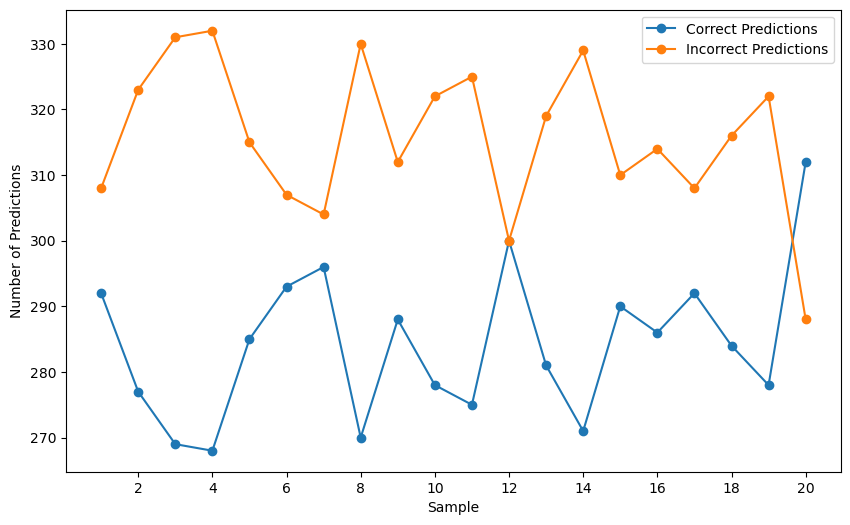

In [127]:
print("Fold 1 Results")
print("--------")
print("Correct Predictions: "+str(fold_1_correct_predictions))
print("--------")
print("Incorrect Predictions: "+str(fold_1_incorrect_predictions))
print("--------")
print("Correct Percentage: "+ str(fold_1_correct_percentages))
print("--------")
print("Incorrect Percentage: "+ str(fold_1_incorrect_percentages))
print("--------")
print("--------")
print("Fold 1 results: "+ str(fold_1_results))
print("--------")

plot_graph(fold_1_correct_predictions, fold_1_incorrect_predictions, 1)

data = {
    'Correct Predictions': fold_1_correct_predictions,
    'Incorrect Predictions': fold_1_incorrect_predictions,
    'Correct Percentage': fold_1_correct_percentages,
    'Incorrect Percentage': fold_1_incorrect_percentages
}

save_data_to_excel(data, "fold_1_results.xlsx", "Fold 1 Results")



In [80]:
# fold_2_results = fold_2_incorrect_percentages
# fold_2_correct_predictions = fold_2_incorrect_percentages[0]
# fold_2_incorrect_predictions = get_incorrect(fold_2_correct_predictions)
# fold_2_correct_percentages = fold_2_incorrect_percentages[2]
# fold_2_incorrect_percentages = fold_2_incorrect_percentages[3]

Fold 2 Results
--------
Correct Predictions: [291, 264, 292, 294, 302, 294, 283, 288, 298, 287, 285, 286, 273, 274, 310, 300, 294, 291, 291, 283]
--------
Incorrect Predictions: [309, 336, 308, 306, 298, 306, 317, 312, 302, 313, 315, 314, 327, 326, 290, 300, 306, 309, 309, 317]
--------
Correct Percentage: [48.5, 44.0, 48.66666666666667, 49.0, 50.33333333333333, 49.0, 47.16666666666667, 48.0, 49.666666666666664, 47.833333333333336, 47.5, 47.66666666666667, 45.5, 45.666666666666664, 51.66666666666667, 50.0, 49.0, 48.5, 48.5, 47.16666666666667]
--------
Incorrect Percentage: [51.5, 56.00000000000001, 51.33333333333333, 51.0, 49.666666666666664, 51.0, 52.83333333333333, 52.0, 50.33333333333333, 52.166666666666664, 52.5, 52.33333333333333, 54.50000000000001, 54.333333333333336, 48.333333333333336, 50.0, 51.0, 51.5, 51.5, 52.83333333333333]
--------
--------
Fold 2 results: ([291, 264, 292, 294, 302, 294, 283, 288, 298, 287, 285, 286, 273, 274, 310, 300, 294, 291, 291, 283], [291, 264, 292,

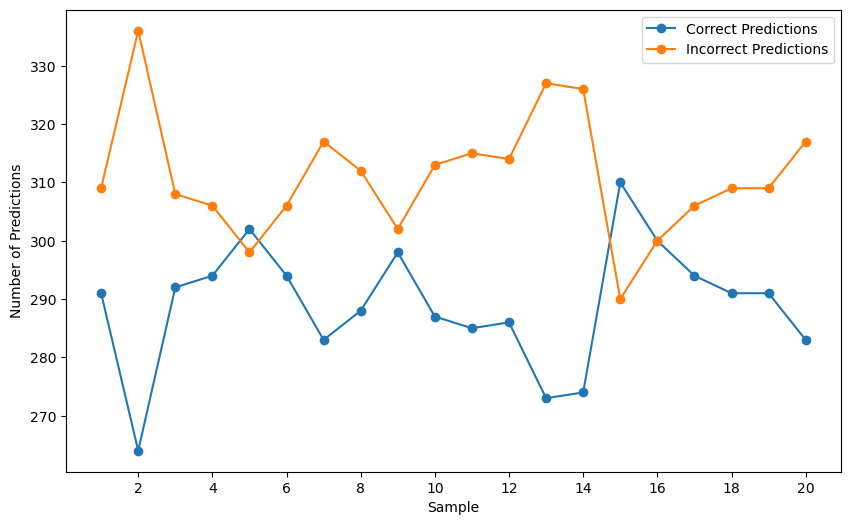

In [128]:
print("Fold 2 Results")
print("--------")
print("Correct Predictions: "+str(fold_2_correct_predictions))
print("--------")
print("Incorrect Predictions: "+str(fold_2_incorrect_predictions))
print("--------")
print("Correct Percentage: "+ str(fold_2_correct_percentages))
print("--------")
print("Incorrect Percentage: "+ str(fold_2_incorrect_percentages))
print("--------")
print("--------")
print("Fold 2 results: "+ str(fold_2_results))
print("--------")

plot_graph(fold_2_correct_predictions, fold_2_incorrect_predictions, 2)

data = {
    'Correct Predictions': fold_2_correct_predictions,
    'Incorrect Predictions': fold_2_incorrect_predictions,
    'Correct Percentage': fold_2_correct_percentages,
    'Incorrect Percentage': fold_2_incorrect_percentages
}

save_data_to_excel(data, "fold_2_results.xlsx", "Fold 2 Results")


In [82]:
# fold_3_results = fold_3_incorrect_percentages
# fold_3_correct_predictions = fold_3_incorrect_percentages[0]
# fold_3_incorrect_predictions = get_incorrect(fold_3_correct_predictions)
# fold_3_correct_percentages = fold_3_incorrect_percentages[2]
# fold_3_incorrect_percentages = fold_3_incorrect_percentages[3]

Fold 3 Results
--------
Correct Predictions: [262, 269, 281, 264, 296, 297, 286, 278, 292, 278, 299, 277, 293, 295, 284, 277, 315, 287, 301, 290]
--------
Incorrect Predictions: [338, 331, 319, 336, 304, 303, 314, 322, 308, 322, 301, 323, 307, 305, 316, 323, 285, 313, 299, 310]
--------
Correct Percentage: [43.666666666666664, 44.83333333333333, 46.833333333333336, 44.0, 49.333333333333336, 49.5, 47.66666666666667, 46.33333333333333, 48.66666666666667, 46.33333333333333, 49.833333333333336, 46.166666666666664, 48.833333333333336, 49.166666666666664, 47.333333333333336, 46.166666666666664, 52.5, 47.833333333333336, 50.16666666666667, 48.333333333333336]
--------
Incorrect Percentage: [56.333333333333336, 55.166666666666664, 53.166666666666664, 56.00000000000001, 50.66666666666667, 50.5, 52.33333333333333, 53.666666666666664, 51.33333333333333, 53.666666666666664, 50.16666666666667, 53.833333333333336, 51.16666666666667, 50.83333333333333, 52.666666666666664, 53.833333333333336, 47.5, 52

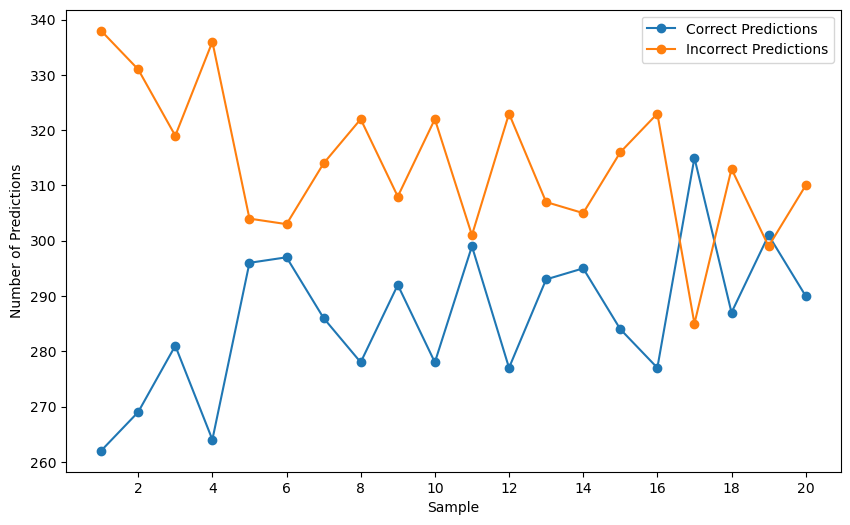

In [129]:
print("Fold 3 Results")
print("--------")
print("Correct Predictions: "+str(fold_3_correct_predictions))
print("--------")
print("Incorrect Predictions: "+str(fold_3_incorrect_predictions))
print("--------")
print("Correct Percentage: "+ str(fold_3_correct_percentages))
print("--------")
print("Incorrect Percentage: "+ str(fold_3_incorrect_percentages))
print("--------")
print("--------")
print("Fold 3 results: "+ str(fold_3_results))
print("--------")

plot_graph(fold_3_correct_predictions, fold_3_incorrect_predictions, 3)

data = {
    'Correct Predictions': fold_3_correct_predictions,
    'Incorrect Predictions': fold_3_incorrect_predictions,
    'Correct Percentage': fold_3_correct_percentages,
    'Incorrect Percentage': fold_3_incorrect_percentages
}

save_data_to_excel(data, "fold_3_results.xlsx", "Fold 3 Results")


Fold 4 Results
--------
Correct Predictions: [303, 295, 282, 290, 285, 291, 297, 291, 301, 298, 280, 288, 297, 296, 287, 294, 271, 280, 302, 309]
--------
Incorrect Predictions: [297, 305, 318, 310, 315, 309, 303, 309, 299, 302, 320, 312, 303, 304, 313, 306, 329, 320, 298, 291]
--------
Correct Percentage: [50.5, 49.166666666666664, 47.0, 48.333333333333336, 47.5, 48.5, 49.5, 48.5, 50.16666666666667, 49.666666666666664, 46.666666666666664, 48.0, 49.5, 49.333333333333336, 47.833333333333336, 49.0, 45.166666666666664, 46.666666666666664, 50.33333333333333, 51.5]
--------
Incorrect Percentage: [49.5, 50.83333333333333, 53.0, 51.66666666666667, 52.5, 51.5, 50.5, 51.5, 49.833333333333336, 50.33333333333333, 53.333333333333336, 52.0, 50.5, 50.66666666666667, 52.166666666666664, 51.0, 54.833333333333336, 53.333333333333336, 49.666666666666664, 48.5]
--------
--------
Fold 4 results: ([303, 295, 282, 290, 285, 291, 297, 291, 301, 298, 280, 288, 297, 296, 287, 294, 271, 280, 302, 309], [303, 29

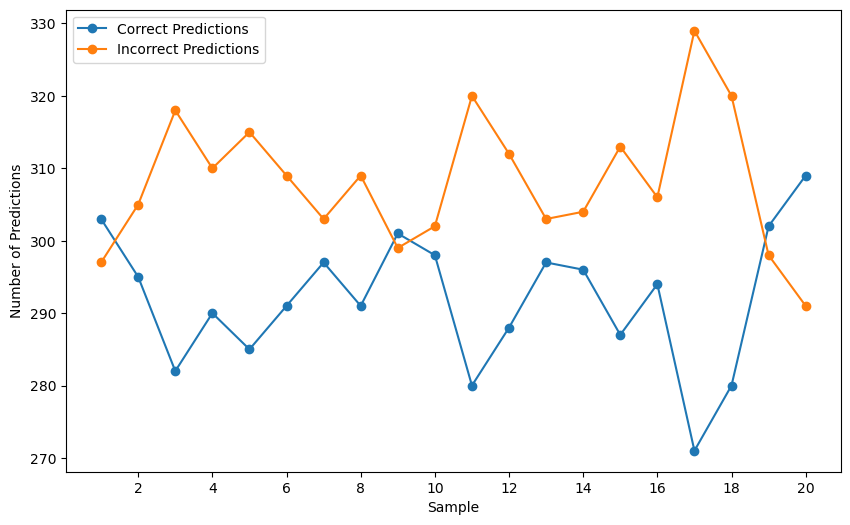

In [130]:
# fold_4_results = fold_4_incorrect_percentages
# fold_4_correct_predictions = fold_4_incorrect_percentages[0]
# fold_4_incorrect_predictions = get_incorrect(fold_4_correct_predictions)
# fold_4_correct_percentages = fold_4_incorrect_percentages[2]
# fold_4_incorrect_percentages = fold_4_incorrect_percentages[3]

print("Fold 4 Results")
print("--------")
print("Correct Predictions: "+str(fold_4_correct_predictions))
print("--------")
print("Incorrect Predictions: "+str(fold_4_incorrect_predictions))
print("--------")
print("Correct Percentage: "+ str(fold_4_correct_percentages))
print("--------")
print("Incorrect Percentage: "+ str(fold_4_incorrect_percentages))
print("--------")
print("--------")
print("Fold 4 results: "+ str(fold_4_results))
print("--------")

plot_graph(fold_4_correct_predictions, fold_4_incorrect_predictions, 4)

data = {
    'Correct Predictions': fold_4_correct_predictions,
    'Incorrect Predictions': fold_4_incorrect_predictions,
    'Correct Percentage': fold_4_correct_percentages,
    'Incorrect Percentage': fold_4_incorrect_percentages
}

save_data_to_excel(data, "fold_4_results.xlsx", "Fold 4 Results")

Fold 5 Results
--------
Correct Predictions: [270, 292, 296, 292, 271, 280, 303, 305, 293, 296, 285, 289, 284, 281, 301, 290, 290, 306, 297, 295]
--------
Incorrect Predictions: [330, 308, 304, 308, 329, 320, 297, 295, 307, 304, 315, 311, 316, 319, 299, 310, 310, 294, 303, 305]
--------
Correct Percentage: [45.0, 48.66666666666667, 49.333333333333336, 48.66666666666667, 45.166666666666664, 46.666666666666664, 50.5, 50.83333333333333, 48.833333333333336, 49.333333333333336, 47.5, 48.16666666666667, 47.333333333333336, 46.833333333333336, 50.16666666666667, 48.333333333333336, 48.333333333333336, 51.0, 49.5, 49.166666666666664]
--------
Incorrect Percentage: [55.00000000000001, 51.33333333333333, 50.66666666666667, 51.33333333333333, 54.833333333333336, 53.333333333333336, 49.5, 49.166666666666664, 51.16666666666667, 50.66666666666667, 52.5, 51.83333333333333, 52.666666666666664, 53.166666666666664, 49.833333333333336, 51.66666666666667, 51.66666666666667, 49.0, 50.5, 50.83333333333333]


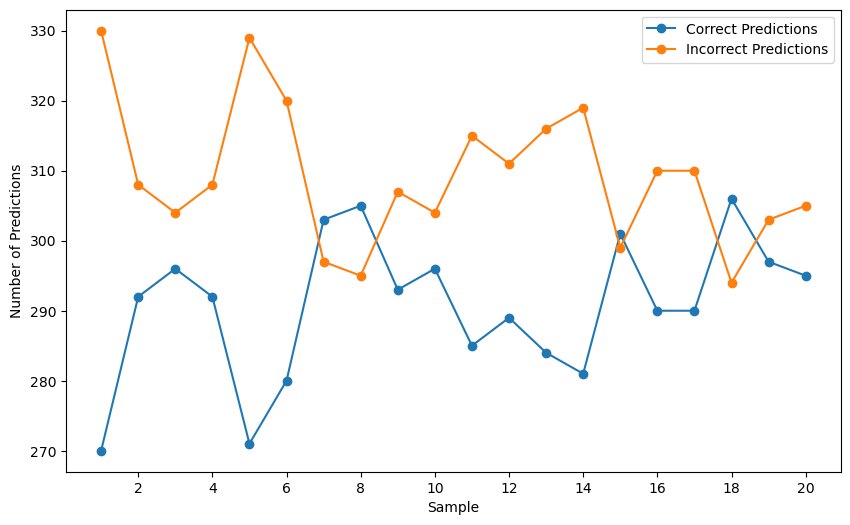

In [132]:
# fold_5_results = fold_5_incorrect_percentages
# fold_5_correct_predictions = fold_5_incorrect_percentages[0]
# fold_5_incorrect_predictions = get_incorrect(fold_5_correct_predictions)
# fold_5_correct_percentages = fold_5_incorrect_percentages[2]
# fold_5_incorrect_percentages = fold_5_incorrect_percentages[3]

print("Fold 5 Results")
print("--------")
print("Correct Predictions: "+str(fold_5_correct_predictions))
print("--------")
print("Incorrect Predictions: "+str(fold_5_incorrect_predictions))
print("--------")
print("Correct Percentage: "+ str(fold_5_correct_percentages))
print("--------")
print("Incorrect Percentage: "+ str(fold_5_incorrect_percentages))
print("--------")
print("--------")
print("Fold 5 results: "+ str(fold_5_results))
print("--------")

plot_graph(fold_5_correct_predictions, fold_5_incorrect_predictions, 5)

data = {
    'Correct Predictions': fold_5_correct_predictions,
    'Incorrect Predictions': fold_5_incorrect_predictions,
    'Correct Percentage': fold_5_correct_percentages,
    'Incorrect Percentage': fold_5_incorrect_percentages
}

save_data_to_excel(data, "fold_5_results.xlsx", "Fold 5 Results")

4  documents deleted
['D:\\Test files\\test_14', 'D:\\Test files\\test_12', 'D:\\Test files\\test_19', 'D:\\Test files\\test_2', 'D:\\Test files\\test_16', 'D:\\Test files\\test_13', 'D:\\Test files\\test_1', 'D:\\Test files\\test_3', 'D:\\Test files\\test_20', 'D:\\Test files\\test_11', 'D:\\Test files\\test_10', 'D:\\Test files\\test_8', 'D:\\Test files\\test_5', 'D:\\Test files\\test_17', 'D:\\Test files\\test_9', 'D:\\Test files\\test_4', 'D:\\Test files\\test_6', 'D:\\Test files\\test_15', 'D:\\Test files\\test_18', 'D:\\Test files\\test_7']
[287, 371, 367, 402, 385, 375, 412, 394, 414, 402, 412, 392, 392, 410, 416, 411, 419, 414, 403, 403]
Fold 1 Results
--------
Correct Predictions: [287, 371, 367, 402, 385, 375, 412, 394, 414, 402, 412, 392, 392, 410, 416, 411, 419, 414, 403, 403]
--------
Incorrect Predictions: [313, 229, 233, 198, 215, 225, 188, 206, 186, 198, 188, 208, 208, 190, 184, 189, 181, 186, 197, 197]
--------
Correct Percentage: [47.833333333333336, 61.83333333333333

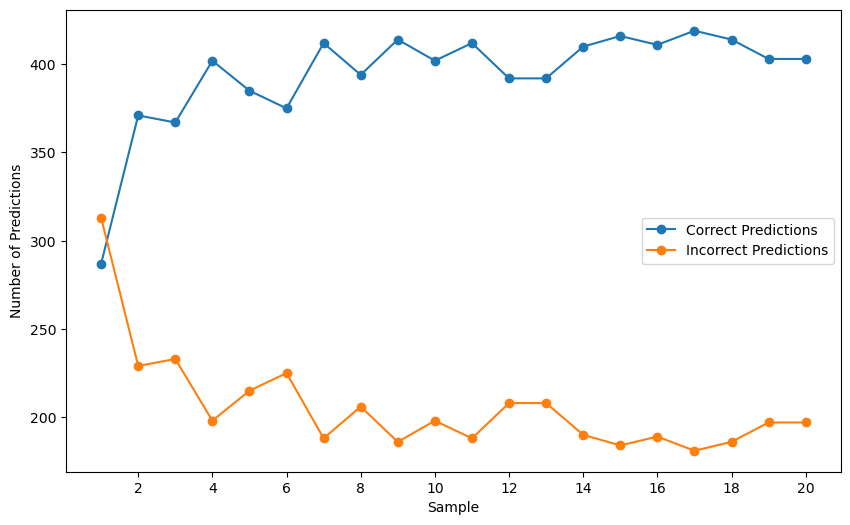

4000  documents deleted
['D:\\Test files\\test_12', 'D:\\Test files\\test_7', 'D:\\Test files\\test_17', 'D:\\Test files\\test_16', 'D:\\Test files\\test_20', 'D:\\Test files\\test_6', 'D:\\Test files\\test_4', 'D:\\Test files\\test_18', 'D:\\Test files\\test_14', 'D:\\Test files\\test_2', 'D:\\Test files\\test_5', 'D:\\Test files\\test_8', 'D:\\Test files\\test_9', 'D:\\Test files\\test_3', 'D:\\Test files\\test_19', 'D:\\Test files\\test_15', 'D:\\Test files\\test_13', 'D:\\Test files\\test_11', 'D:\\Test files\\test_1', 'D:\\Test files\\test_10']
[292, 356, 393, 388, 402, 406, 400, 394, 403, 404, 395, 386, 419, 411, 421, 409, 401, 412, 419, 417]
Fold 2 Results
--------
Correct Predictions: [292, 356, 393, 388, 402, 406, 400, 394, 403, 404, 395, 386, 419, 411, 421, 409, 401, 412, 419, 417]
--------
Incorrect Predictions: [308, 244, 207, 212, 198, 194, 200, 206, 197, 196, 205, 214, 181, 189, 179, 191, 199, 188, 181, 183]
--------
Correct Percentage: [48.66666666666667, 59.333333333333

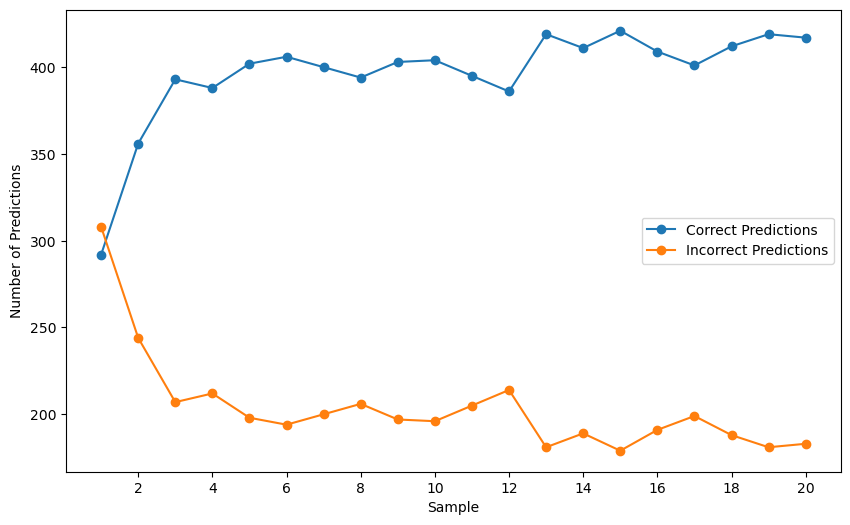

4000  documents deleted
['D:\\Test files\\test_15', 'D:\\Test files\\test_11', 'D:\\Test files\\test_18', 'D:\\Test files\\test_4', 'D:\\Test files\\test_16', 'D:\\Test files\\test_9', 'D:\\Test files\\test_14', 'D:\\Test files\\test_8', 'D:\\Test files\\test_20', 'D:\\Test files\\test_3', 'D:\\Test files\\test_10', 'D:\\Test files\\test_2', 'D:\\Test files\\test_6', 'D:\\Test files\\test_1', 'D:\\Test files\\test_17', 'D:\\Test files\\test_5', 'D:\\Test files\\test_7', 'D:\\Test files\\test_19', 'D:\\Test files\\test_12', 'D:\\Test files\\test_13']
[329, 378, 398, 395, 396, 415, 405, 388, 414, 395, 412, 417, 412, 406, 408, 393, 399, 422, 417, 401]
Fold 3 Results
--------
Correct Predictions: [329, 378, 398, 395, 396, 415, 405, 388, 414, 395, 412, 417, 412, 406, 408, 393, 399, 422, 417, 401]
--------
Incorrect Predictions: [271, 222, 202, 205, 204, 185, 195, 212, 186, 205, 188, 183, 188, 194, 192, 207, 201, 178, 183, 199]
--------
Correct Percentage: [54.833333333333336, 63.0, 66.33333

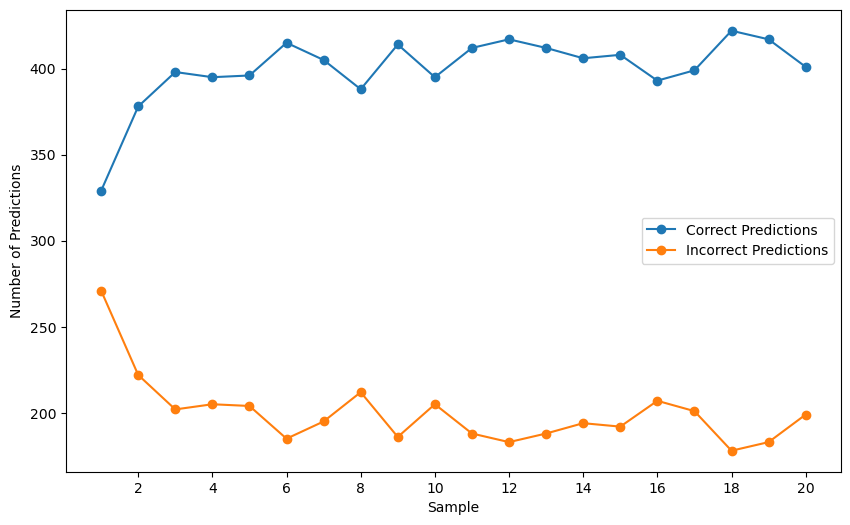

4000  documents deleted
['D:\\Test files\\test_13', 'D:\\Test files\\test_17', 'D:\\Test files\\test_12', 'D:\\Test files\\test_16', 'D:\\Test files\\test_10', 'D:\\Test files\\test_1', 'D:\\Test files\\test_14', 'D:\\Test files\\test_6', 'D:\\Test files\\test_9', 'D:\\Test files\\test_18', 'D:\\Test files\\test_15', 'D:\\Test files\\test_7', 'D:\\Test files\\test_20', 'D:\\Test files\\test_5', 'D:\\Test files\\test_8', 'D:\\Test files\\test_4', 'D:\\Test files\\test_3', 'D:\\Test files\\test_19', 'D:\\Test files\\test_2', 'D:\\Test files\\test_11']
[295, 375, 398, 384, 402, 406, 398, 405, 413, 391, 406, 396, 414, 396, 388, 409, 412, 421, 420, 408]
Fold 4 Results
--------
Correct Predictions: [295, 375, 398, 384, 402, 406, 398, 405, 413, 391, 406, 396, 414, 396, 388, 409, 412, 421, 420, 408]
--------
Incorrect Predictions: [305, 225, 202, 216, 198, 194, 202, 195, 187, 209, 194, 204, 186, 204, 212, 191, 188, 179, 180, 192]
--------
Correct Percentage: [49.166666666666664, 62.5, 66.33333

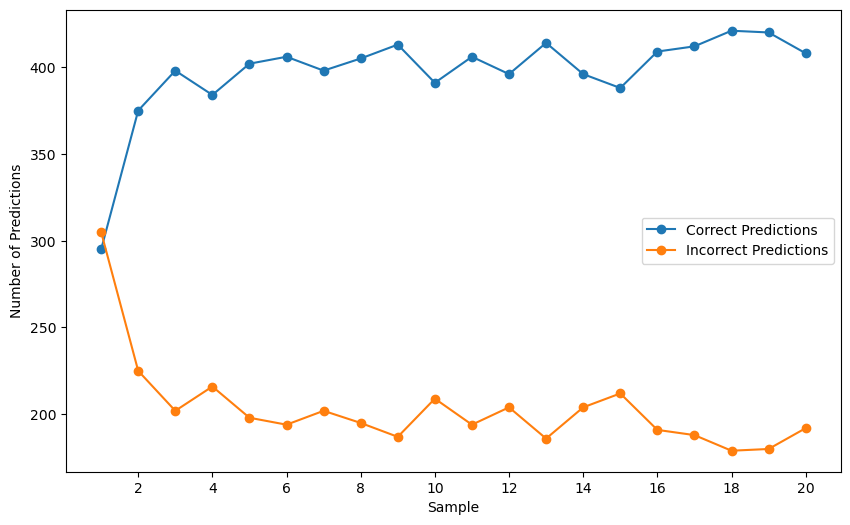

4000  documents deleted
['D:\\Test files\\test_9', 'D:\\Test files\\test_20', 'D:\\Test files\\test_16', 'D:\\Test files\\test_14', 'D:\\Test files\\test_1', 'D:\\Test files\\test_13', 'D:\\Test files\\test_6', 'D:\\Test files\\test_17', 'D:\\Test files\\test_4', 'D:\\Test files\\test_3', 'D:\\Test files\\test_7', 'D:\\Test files\\test_18', 'D:\\Test files\\test_19', 'D:\\Test files\\test_2', 'D:\\Test files\\test_5', 'D:\\Test files\\test_8', 'D:\\Test files\\test_11', 'D:\\Test files\\test_10', 'D:\\Test files\\test_15', 'D:\\Test files\\test_12']
[322, 367, 374, 393, 399, 374, 405, 396, 408, 404, 402, 403, 425, 414, 397, 391, 408, 416, 415, 417]
Fold 5 Results
--------
Correct Predictions: [322, 367, 374, 393, 399, 374, 405, 396, 408, 404, 402, 403, 425, 414, 397, 391, 408, 416, 415, 417]
--------
Incorrect Predictions: [278, 233, 226, 207, 201, 226, 195, 204, 192, 196, 198, 197, 175, 186, 203, 209, 192, 184, 185, 183]
--------
Correct Percentage: [53.666666666666664, 61.16666666666

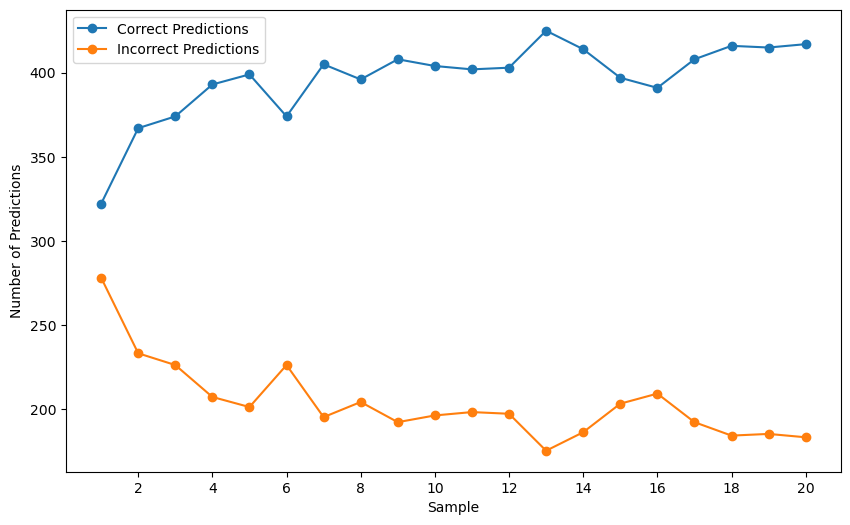

In [14]:
fld_1_src_folders = random.sample(src_folders, len(src_folders))
fld_2_src_folders = random.sample(src_folders, len(src_folders))
fld_3_src_folders = random.sample(src_folders, len(src_folders))
fld_4_src_folders = random.sample(src_folders, len(src_folders))
fld_5_src_folders = random.sample(src_folders, len(src_folders))


reset_endpoint = "http://localhost:5000/"


clear_data()
response = requests.post(reset_endpoint)  
kn_results_fold_1 = process_images(fld_1_src_folders, endpoint_2)
print_results(kn_results_fold_1, 1)
data = prep_to_save(kn_results_fold_1)
save_data_to_excel(data, "kn_fold_1_results.xlsx", "Fold 1 Results")


clear_data()
response = requests.post(reset_endpoint)  
kn_results_fold_2 = process_images(fld_2_src_folders, endpoint_2)
print_results(kn_results_fold_2, 2)
data = prep_to_save(kn_results_fold_2)
save_data_to_excel(data, "kn_fold_2_results.xlsx", "Fold 2 Results")


clear_data()
response = requests.post(reset_endpoint)  
kn_results_fold_3 = process_images(fld_3_src_folders, endpoint_2)
print_results(kn_results_fold_3, 3)
data = prep_to_save(kn_results_fold_3)
save_data_to_excel(data, "kn_fold_3_results.xlsx", "Fold 3 Results")


clear_data()
response = requests.post(reset_endpoint)  
kn_results_fold_4 = process_images(fld_4_src_folders, endpoint_2)
print_results(kn_results_fold_4, 4)
data = prep_to_save(kn_results_fold_4)
save_data_to_excel(data, "kn_fold_4_results.xlsx", "Fold 4 Results")


clear_data()
response = requests.post(reset_endpoint)  
kn_results_fold_5 = process_images(fld_5_src_folders, endpoint_2)
print_results(kn_results_fold_5, 5)
data = prep_to_save(kn_results_fold_5)
save_data_to_excel(data, "kn_fold_5_results.xlsx", "Fold 5 Results")

0  documents deleted
['D:\\Test files\\test_2', 'D:\\Test files\\test_3', 'D:\\Test files\\test_18', 'D:\\Test files\\test_5', 'D:\\Test files\\test_14', 'D:\\Test files\\test_9', 'D:\\Test files\\test_10', 'D:\\Test files\\test_13', 'D:\\Test files\\test_16', 'D:\\Test files\\test_7', 'D:\\Test files\\test_19', 'D:\\Test files\\test_12', 'D:\\Test files\\test_20', 'D:\\Test files\\test_17', 'D:\\Test files\\test_15', 'D:\\Test files\\test_6', 'D:\\Test files\\test_1', 'D:\\Test files\\test_8', 'D:\\Test files\\test_11', 'D:\\Test files\\test_4']
[281, 298, 278, 290, 276, 295, 298, 265, 305, 281, 283, 294, 300, 292, 299, 289, 301, 280, 295, 285]
Fold 1 Results
--------
Correct Predictions: [281, 298, 278, 290, 276, 295, 298, 265, 305, 281, 283, 294, 300, 292, 299, 289, 301, 280, 295, 285]
--------
Incorrect Predictions: [319, 302, 322, 310, 324, 305, 302, 335, 295, 319, 317, 306, 300, 308, 301, 311, 299, 320, 305, 315]
--------
Correct Percentage: [46.833333333333336, 49.66666666666666

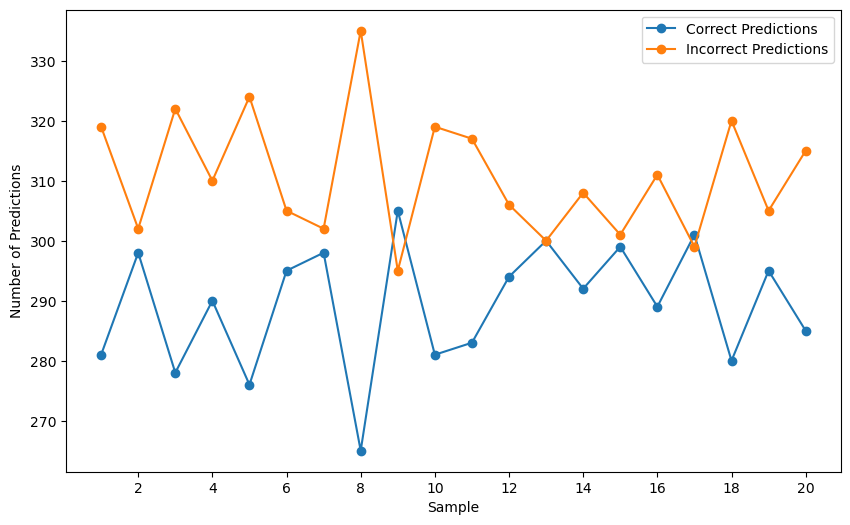

4000  documents deleted
['D:\\Test files\\test_2', 'D:\\Test files\\test_20', 'D:\\Test files\\test_4', 'D:\\Test files\\test_6', 'D:\\Test files\\test_12', 'D:\\Test files\\test_9', 'D:\\Test files\\test_7', 'D:\\Test files\\test_11', 'D:\\Test files\\test_18', 'D:\\Test files\\test_10', 'D:\\Test files\\test_16', 'D:\\Test files\\test_8', 'D:\\Test files\\test_14', 'D:\\Test files\\test_13', 'D:\\Test files\\test_1', 'D:\\Test files\\test_15', 'D:\\Test files\\test_3', 'D:\\Test files\\test_17', 'D:\\Test files\\test_5', 'D:\\Test files\\test_19']
[281, 300, 285, 289, 294, 295, 281, 295, 278, 298, 305, 280, 276, 265, 301, 299, 298, 292, 290, 283]
Fold 2 Results
--------
Correct Predictions: [281, 300, 285, 289, 294, 295, 281, 295, 278, 298, 305, 280, 276, 265, 301, 299, 298, 292, 290, 283]
--------
Incorrect Predictions: [319, 300, 315, 311, 306, 305, 319, 305, 322, 302, 295, 320, 324, 335, 299, 301, 302, 308, 310, 317]
--------
Correct Percentage: [46.833333333333336, 50.0, 47.5, 48

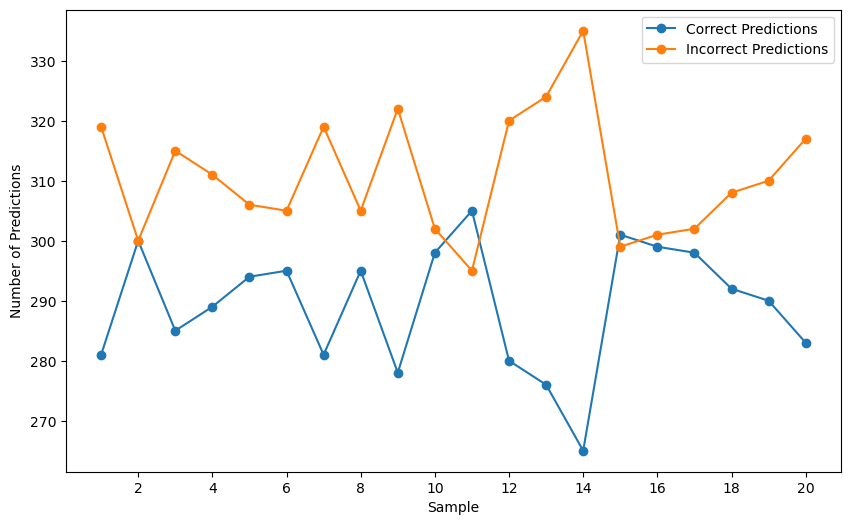

4000  documents deleted
['D:\\Test files\\test_8', 'D:\\Test files\\test_18', 'D:\\Test files\\test_20', 'D:\\Test files\\test_19', 'D:\\Test files\\test_9', 'D:\\Test files\\test_3', 'D:\\Test files\\test_16', 'D:\\Test files\\test_4', 'D:\\Test files\\test_17', 'D:\\Test files\\test_10', 'D:\\Test files\\test_15', 'D:\\Test files\\test_11', 'D:\\Test files\\test_13', 'D:\\Test files\\test_12', 'D:\\Test files\\test_6', 'D:\\Test files\\test_7', 'D:\\Test files\\test_2', 'D:\\Test files\\test_14', 'D:\\Test files\\test_1', 'D:\\Test files\\test_5']
[280, 278, 300, 283, 295, 298, 305, 285, 292, 298, 299, 295, 265, 294, 289, 281, 281, 276, 301, 290]
Fold 3 Results
--------
Correct Predictions: [280, 278, 300, 283, 295, 298, 305, 285, 292, 298, 299, 295, 265, 294, 289, 281, 281, 276, 301, 290]
--------
Incorrect Predictions: [320, 322, 300, 317, 305, 302, 295, 315, 308, 302, 301, 305, 335, 306, 311, 319, 319, 324, 299, 310]
--------
Correct Percentage: [46.666666666666664, 46.33333333333

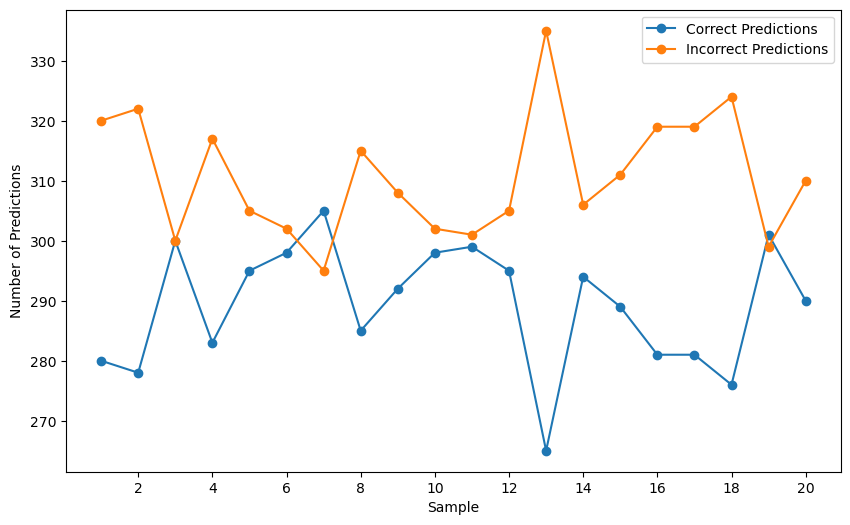

4000  documents deleted
['D:\\Test files\\test_1', 'D:\\Test files\\test_17', 'D:\\Test files\\test_8', 'D:\\Test files\\test_6', 'D:\\Test files\\test_16', 'D:\\Test files\\test_9', 'D:\\Test files\\test_12', 'D:\\Test files\\test_10', 'D:\\Test files\\test_3', 'D:\\Test files\\test_5', 'D:\\Test files\\test_13', 'D:\\Test files\\test_2', 'D:\\Test files\\test_7', 'D:\\Test files\\test_11', 'D:\\Test files\\test_19', 'D:\\Test files\\test_15', 'D:\\Test files\\test_20', 'D:\\Test files\\test_18', 'D:\\Test files\\test_4', 'D:\\Test files\\test_14']
[301, 292, 280, 289, 305, 295, 294, 298, 298, 290, 265, 281, 281, 295, 283, 299, 300, 278, 285, 276]
Fold 4 Results
--------
Correct Predictions: [301, 292, 280, 289, 305, 295, 294, 298, 298, 290, 265, 281, 281, 295, 283, 299, 300, 278, 285, 276]
--------
Incorrect Predictions: [299, 308, 320, 311, 295, 305, 306, 302, 302, 310, 335, 319, 319, 305, 317, 301, 300, 322, 315, 324]
--------
Correct Percentage: [50.16666666666667, 48.666666666666

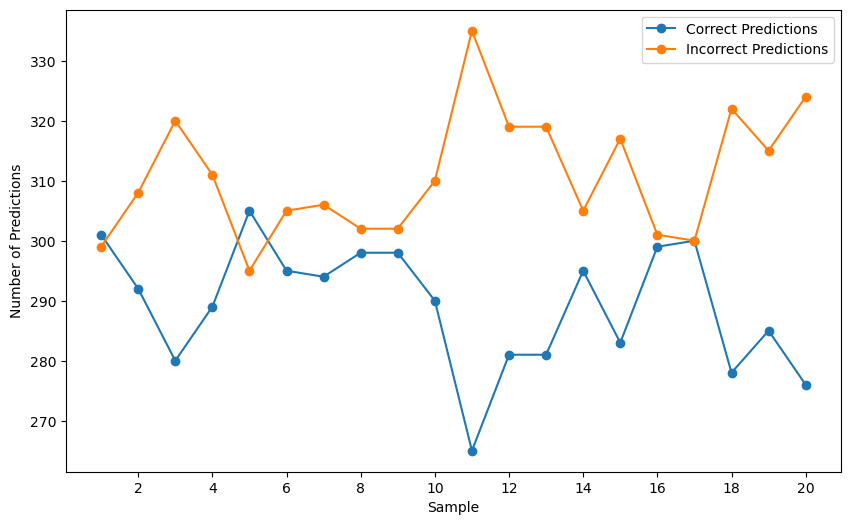

4000  documents deleted
['D:\\Test files\\test_10', 'D:\\Test files\\test_7', 'D:\\Test files\\test_20', 'D:\\Test files\\test_11', 'D:\\Test files\\test_12', 'D:\\Test files\\test_18', 'D:\\Test files\\test_2', 'D:\\Test files\\test_16', 'D:\\Test files\\test_1', 'D:\\Test files\\test_14', 'D:\\Test files\\test_17', 'D:\\Test files\\test_6', 'D:\\Test files\\test_15', 'D:\\Test files\\test_3', 'D:\\Test files\\test_4', 'D:\\Test files\\test_9', 'D:\\Test files\\test_19', 'D:\\Test files\\test_8', 'D:\\Test files\\test_13', 'D:\\Test files\\test_5']
[298, 281, 300, 295, 294, 278, 281, 305, 301, 276, 292, 289, 299, 298, 285, 295, 283, 280, 265, 290]
Fold 5 Results
--------
Correct Predictions: [298, 281, 300, 295, 294, 278, 281, 305, 301, 276, 292, 289, 299, 298, 285, 295, 283, 280, 265, 290]
--------
Incorrect Predictions: [302, 319, 300, 305, 306, 322, 319, 295, 299, 324, 308, 311, 301, 302, 315, 305, 317, 320, 335, 310]
--------
Correct Percentage: [49.666666666666664, 46.83333333333

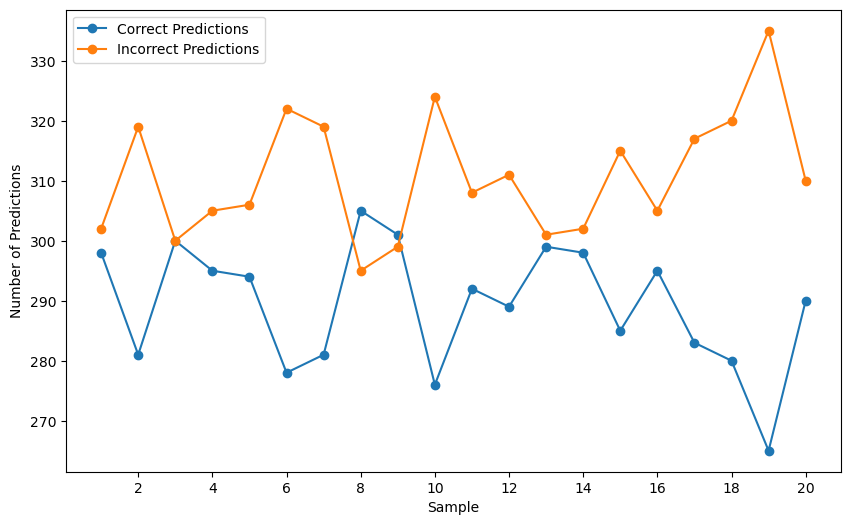

In [22]:
# Just Clip & fairface labels #
fld_1_src_folders = random.sample(src_folders, len(src_folders))
fld_2_src_folders = random.sample(src_folders, len(src_folders))
fld_3_src_folders = random.sample(src_folders, len(src_folders))
fld_4_src_folders = random.sample(src_folders, len(src_folders))
fld_5_src_folders = random.sample(src_folders, len(src_folders))

reset_endpoint = "http://localhost:5000/"


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_1 = process_images(fld_1_src_folders, endpoint_3)
print_results(clip_results_fold_1, 1)
data = prep_to_save(clip_results_fold_1)
save_data_to_excel(data, "just_clip_fold_1_results.xlsx", "Fold 1 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_2 = process_images(fld_2_src_folders, endpoint_3)
print_results(clip_results_fold_2, 2)
data = prep_to_save(clip_results_fold_2)
save_data_to_excel(data, "just_clip_fold_2_results.xlsx", "Fold 2 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_3 = process_images(fld_3_src_folders, endpoint_3)
print_results(clip_results_fold_3, 3)
data = prep_to_save(clip_results_fold_3)
save_data_to_excel(data, "just_clip_fold_3_results.xlsx", "Fold 3 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_4 = process_images(fld_4_src_folders, endpoint_3)
print_results(clip_results_fold_4, 4)
data = prep_to_save(clip_results_fold_4)
save_data_to_excel(data, "just_clip_fold_4_results.xlsx", "Fold 4 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_5 = process_images(fld_5_src_folders, endpoint_3)
print_results(clip_results_fold_5, 5)
data = prep_to_save(clip_results_fold_5)
save_data_to_excel(data, "just_clip_fold_5_results.xlsx", "Fold 5 Results")


0  documents deleted
['D:\\Test files\\test_40', 'D:\\Test files\\test_2', 'D:\\Test files\\test_35', 'D:\\Test files\\test_16', 'D:\\Test files\\test_38', 'D:\\Test files\\test_23', 'D:\\Test files\\test_15', 'D:\\Test files\\test_1', 'D:\\Test files\\test_3', 'D:\\Test files\\test_22', 'D:\\Test files\\test_30', 'D:\\Test files\\test_37', 'D:\\Test files\\test_25', 'D:\\Test files\\test_7', 'D:\\Test files\\test_33', 'D:\\Test files\\test_19', 'D:\\Test files\\test_32', 'D:\\Test files\\test_31', 'D:\\Test files\\test_36', 'D:\\Test files\\test_9', 'D:\\Test files\\test_27', 'D:\\Test files\\test_34', 'D:\\Test files\\test_21', 'D:\\Test files\\test_24', 'D:\\Test files\\test_5', 'D:\\Test files\\test_12', 'D:\\Test files\\test_18', 'D:\\Test files\\test_4', 'D:\\Test files\\test_28', 'D:\\Test files\\test_6', 'D:\\Test files\\test_29', 'D:\\Test files\\test_26', 'D:\\Test files\\test_13', 'D:\\Test files\\test_14', 'D:\\Test files\\test_17', 'D:\\Test files\\test_20', 'D:\\Test file

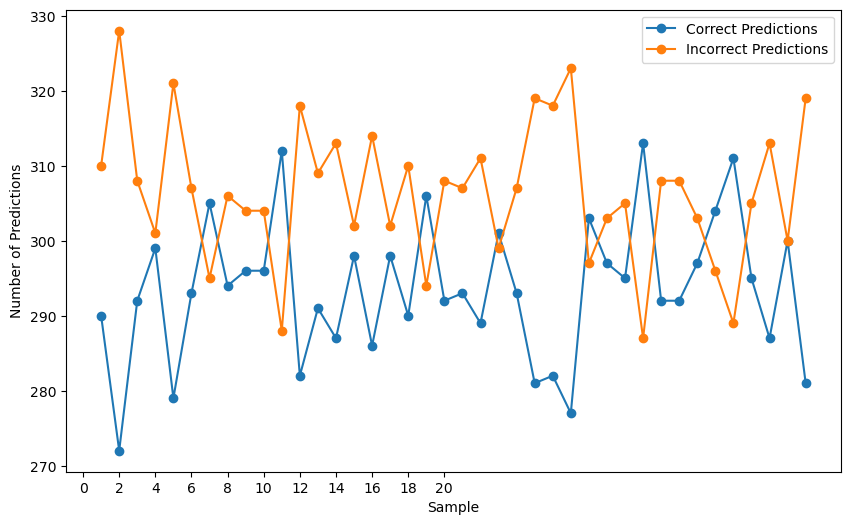

8000  documents deleted
['D:\\Test files\\test_16', 'D:\\Test files\\test_37', 'D:\\Test files\\test_31', 'D:\\Test files\\test_18', 'D:\\Test files\\test_26', 'D:\\Test files\\test_34', 'D:\\Test files\\test_4', 'D:\\Test files\\test_29', 'D:\\Test files\\test_24', 'D:\\Test files\\test_5', 'D:\\Test files\\test_38', 'D:\\Test files\\test_19', 'D:\\Test files\\test_20', 'D:\\Test files\\test_27', 'D:\\Test files\\test_6', 'D:\\Test files\\test_15', 'D:\\Test files\\test_39', 'D:\\Test files\\test_7', 'D:\\Test files\\test_2', 'D:\\Test files\\test_8', 'D:\\Test files\\test_23', 'D:\\Test files\\test_40', 'D:\\Test files\\test_28', 'D:\\Test files\\test_12', 'D:\\Test files\\test_33', 'D:\\Test files\\test_3', 'D:\\Test files\\test_17', 'D:\\Test files\\test_30', 'D:\\Test files\\test_35', 'D:\\Test files\\test_36', 'D:\\Test files\\test_11', 'D:\\Test files\\test_21', 'D:\\Test files\\test_9', 'D:\\Test files\\test_14', 'D:\\Test files\\test_1', 'D:\\Test files\\test_32', 'D:\\Test fi

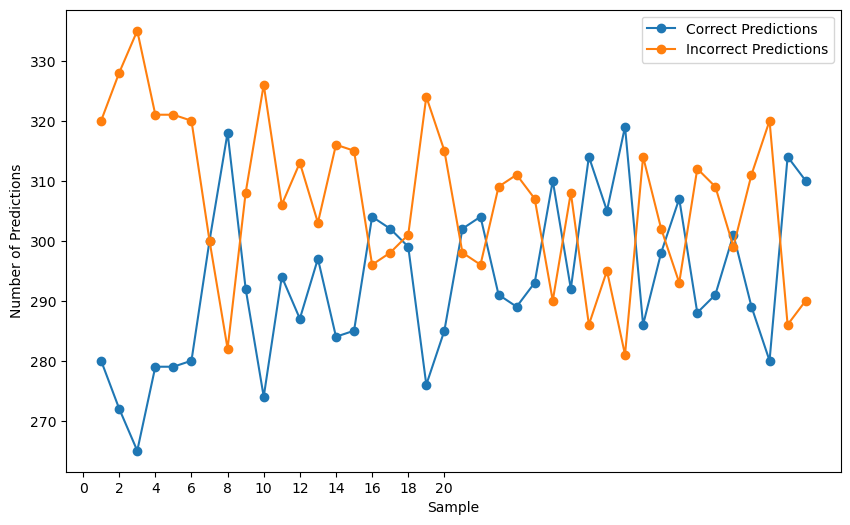

8000  documents deleted
['D:\\Test files\\test_37', 'D:\\Test files\\test_1', 'D:\\Test files\\test_8', 'D:\\Test files\\test_38', 'D:\\Test files\\test_39', 'D:\\Test files\\test_28', 'D:\\Test files\\test_29', 'D:\\Test files\\test_18', 'D:\\Test files\\test_25', 'D:\\Test files\\test_13', 'D:\\Test files\\test_15', 'D:\\Test files\\test_34', 'D:\\Test files\\test_32', 'D:\\Test files\\test_27', 'D:\\Test files\\test_24', 'D:\\Test files\\test_7', 'D:\\Test files\\test_16', 'D:\\Test files\\test_40', 'D:\\Test files\\test_11', 'D:\\Test files\\test_23', 'D:\\Test files\\test_5', 'D:\\Test files\\test_30', 'D:\\Test files\\test_36', 'D:\\Test files\\test_3', 'D:\\Test files\\test_10', 'D:\\Test files\\test_31', 'D:\\Test files\\test_35', 'D:\\Test files\\test_20', 'D:\\Test files\\test_14', 'D:\\Test files\\test_22', 'D:\\Test files\\test_6', 'D:\\Test files\\test_17', 'D:\\Test files\\test_19', 'D:\\Test files\\test_33', 'D:\\Test files\\test_26', 'D:\\Test files\\test_21', 'D:\\Test

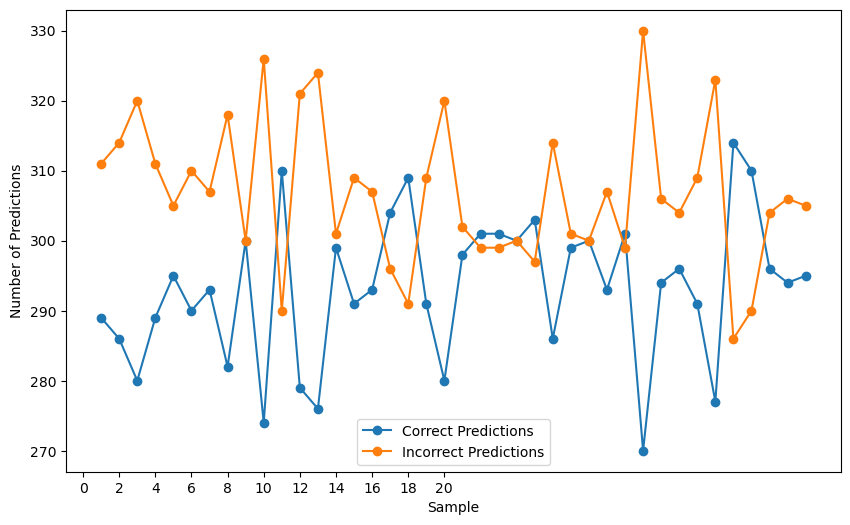

8000  documents deleted
['D:\\Test files\\test_24', 'D:\\Test files\\test_35', 'D:\\Test files\\test_11', 'D:\\Test files\\test_13', 'D:\\Test files\\test_10', 'D:\\Test files\\test_22', 'D:\\Test files\\test_12', 'D:\\Test files\\test_1', 'D:\\Test files\\test_16', 'D:\\Test files\\test_20', 'D:\\Test files\\test_29', 'D:\\Test files\\test_34', 'D:\\Test files\\test_19', 'D:\\Test files\\test_9', 'D:\\Test files\\test_21', 'D:\\Test files\\test_23', 'D:\\Test files\\test_3', 'D:\\Test files\\test_25', 'D:\\Test files\\test_7', 'D:\\Test files\\test_27', 'D:\\Test files\\test_6', 'D:\\Test files\\test_38', 'D:\\Test files\\test_36', 'D:\\Test files\\test_15', 'D:\\Test files\\test_4', 'D:\\Test files\\test_33', 'D:\\Test files\\test_26', 'D:\\Test files\\test_31', 'D:\\Test files\\test_28', 'D:\\Test files\\test_40', 'D:\\Test files\\test_2', 'D:\\Test files\\test_39', 'D:\\Test files\\test_5', 'D:\\Test files\\test_32', 'D:\\Test files\\test_37', 'D:\\Test files\\test_30', 'D:\\Test f

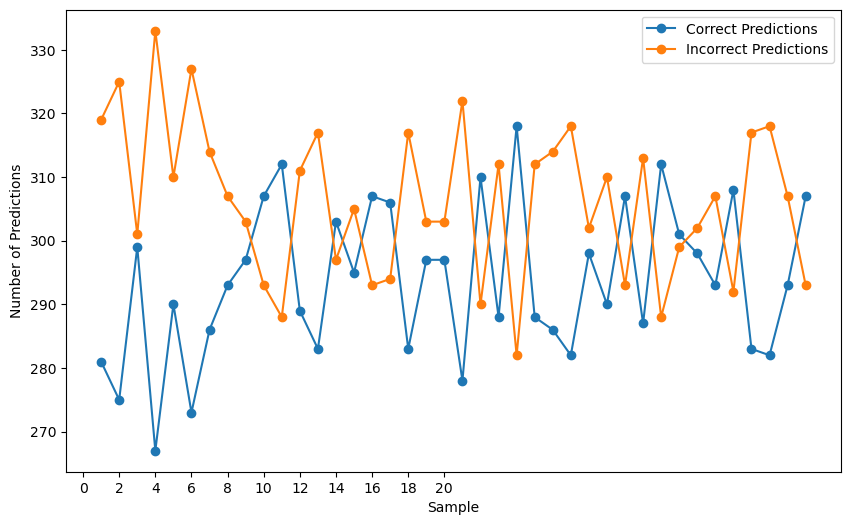

8000  documents deleted
['D:\\Test files\\test_19', 'D:\\Test files\\test_2', 'D:\\Test files\\test_14', 'D:\\Test files\\test_6', 'D:\\Test files\\test_15', 'D:\\Test files\\test_5', 'D:\\Test files\\test_17', 'D:\\Test files\\test_1', 'D:\\Test files\\test_13', 'D:\\Test files\\test_30', 'D:\\Test files\\test_20', 'D:\\Test files\\test_35', 'D:\\Test files\\test_18', 'D:\\Test files\\test_33', 'D:\\Test files\\test_37', 'D:\\Test files\\test_12', 'D:\\Test files\\test_32', 'D:\\Test files\\test_31', 'D:\\Test files\\test_24', 'D:\\Test files\\test_34', 'D:\\Test files\\test_28', 'D:\\Test files\\test_16', 'D:\\Test files\\test_40', 'D:\\Test files\\test_23', 'D:\\Test files\\test_25', 'D:\\Test files\\test_7', 'D:\\Test files\\test_26', 'D:\\Test files\\test_21', 'D:\\Test files\\test_38', 'D:\\Test files\\test_9', 'D:\\Test files\\test_11', 'D:\\Test files\\test_3', 'D:\\Test files\\test_36', 'D:\\Test files\\test_4', 'D:\\Test files\\test_27', 'D:\\Test files\\test_10', 'D:\\Test f

In [ ]:
# rerun of method 2(Dont be wrong method.) This time with 40 batches of test data rather than 20. 

# Just Clip & fairface labels #
fld_1_src_folders = random.sample(src_folders, len(src_folders))
fld_2_src_folders = random.sample(src_folders, len(src_folders))
fld_3_src_folders = random.sample(src_folders, len(src_folders))
fld_4_src_folders = random.sample(src_folders, len(src_folders))
fld_5_src_folders = random.sample(src_folders, len(src_folders))

reset_endpoint = "http://localhost:5000/"


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_1 = process_images(fld_1_src_folders, endpoint_2)
print_results(clip_results_fold_1, 1)
data = prep_to_save(clip_results_fold_1)
save_data_to_excel(data, "Method_2_retest_fold_1_results.xlsx", "Fold 1 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_2 = process_images(fld_2_src_folders, endpoint_2)
print_results(clip_results_fold_2, 2)
data = prep_to_save(clip_results_fold_2)
save_data_to_excel(data, "Method_2_retest_fold_2_results.xlsx", "Fold 2 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_3 = process_images(fld_3_src_folders, endpoint_2)
print_results(clip_results_fold_3, 3)
data = prep_to_save(clip_results_fold_3)
save_data_to_excel(data, "Method_2_retest_fold_3_results.xlsx", "Fold 3 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_4 = process_images(fld_4_src_folders, endpoint_2)
print_results(clip_results_fold_4, 4)
data = prep_to_save(clip_results_fold_4)
save_data_to_excel(data, "Method_2_retest_fold_4_results.xlsx", "Fold 4 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_5 = process_images(fld_5_src_folders, endpoint_2)
print_results(clip_results_fold_5, 5)
data = prep_to_save(clip_results_fold_5)
save_data_to_excel(data, "Method_2_retest_fold_5_results.xlsx", "Fold 5 Results")


0  documents deleted
['D:\\Test files\\test_3', 'D:\\Test files\\test_16', 'D:\\Test files\\test_20', 'D:\\Test files\\test_7', 'D:\\Test files\\test_2', 'D:\\Test files\\test_14', 'D:\\Test files\\test_9', 'D:\\Test files\\test_1', 'D:\\Test files\\test_18', 'D:\\Test files\\test_6', 'D:\\Test files\\test_13', 'D:\\Test files\\test_15', 'D:\\Test files\\test_5', 'D:\\Test files\\test_19', 'D:\\Test files\\test_10', 'D:\\Test files\\test_12', 'D:\\Test files\\test_4', 'D:\\Test files\\test_11', 'D:\\Test files\\test_17', 'D:\\Test files\\test_8']
[401, 387, 413, 406, 399, 397, 404, 420, 393, 409, 390, 413, 416, 413, 392, 407, 405, 391, 405, 390]
Fold 2 Results
--------
Correct Predictions: [401, 387, 413, 406, 399, 397, 404, 420, 393, 409, 390, 413, 416, 413, 392, 407, 405, 391, 405, 390]
--------
Incorrect Predictions: [199, 213, 187, 194, 201, 203, 196, 180, 207, 191, 210, 187, 184, 187, 208, 193, 195, 209, 195, 210]
--------
Correct Percentage: [66.83333333333333, 64.5, 68.833333333

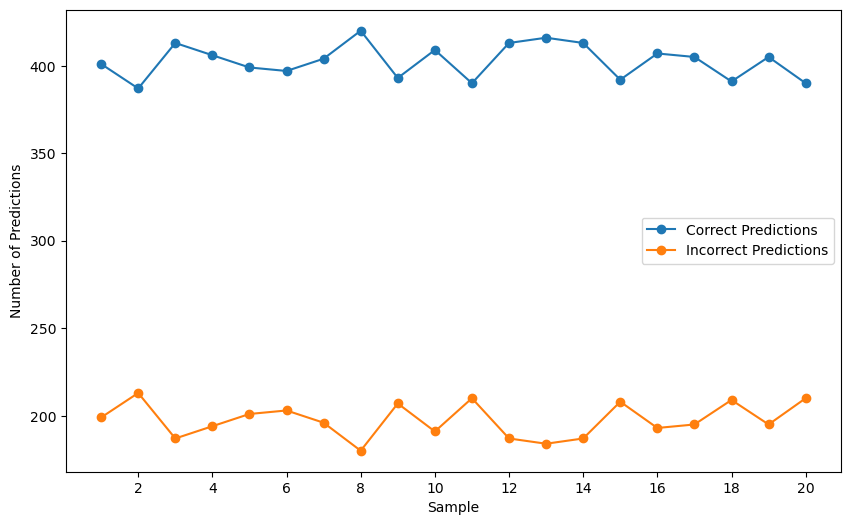

4000  documents deleted
['D:\\Test files\\test_6', 'D:\\Test files\\test_19', 'D:\\Test files\\test_9', 'D:\\Test files\\test_18', 'D:\\Test files\\test_12', 'D:\\Test files\\test_5', 'D:\\Test files\\test_1', 'D:\\Test files\\test_15', 'D:\\Test files\\test_4', 'D:\\Test files\\test_11', 'D:\\Test files\\test_10', 'D:\\Test files\\test_20', 'D:\\Test files\\test_16', 'D:\\Test files\\test_14', 'D:\\Test files\\test_13', 'D:\\Test files\\test_2', 'D:\\Test files\\test_17', 'D:\\Test files\\test_7', 'D:\\Test files\\test_8', 'D:\\Test files\\test_3']
[409, 413, 404, 393, 407, 416, 420, 413, 405, 391, 392, 413, 387, 397, 390, 399, 405, 406, 390, 401]
Fold 3 Results
--------
Correct Predictions: [409, 413, 404, 393, 407, 416, 420, 413, 405, 391, 392, 413, 387, 397, 390, 399, 405, 406, 390, 401]
--------
Incorrect Predictions: [191, 187, 196, 207, 193, 184, 180, 187, 195, 209, 208, 187, 213, 203, 210, 201, 195, 194, 210, 199]
--------
Correct Percentage: [68.16666666666666, 68.833333333333

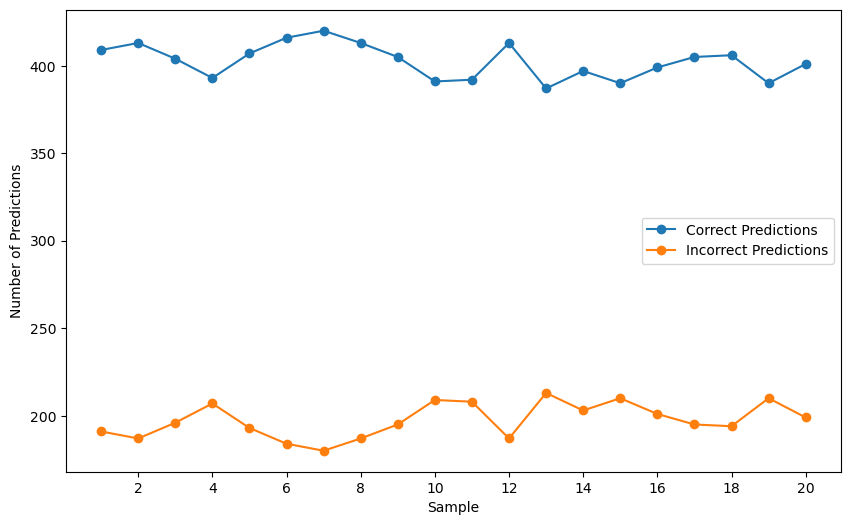

4000  documents deleted
['D:\\Test files\\test_16', 'D:\\Test files\\test_18', 'D:\\Test files\\test_3', 'D:\\Test files\\test_13', 'D:\\Test files\\test_5', 'D:\\Test files\\test_20', 'D:\\Test files\\test_1', 'D:\\Test files\\test_15', 'D:\\Test files\\test_4', 'D:\\Test files\\test_7', 'D:\\Test files\\test_2', 'D:\\Test files\\test_19', 'D:\\Test files\\test_17', 'D:\\Test files\\test_6', 'D:\\Test files\\test_12', 'D:\\Test files\\test_9', 'D:\\Test files\\test_8', 'D:\\Test files\\test_10', 'D:\\Test files\\test_14', 'D:\\Test files\\test_11']
[387, 393, 401, 390, 416, 413, 420, 413, 405, 406, 399, 413, 405, 409, 407, 404, 390, 392, 397, 391]
Fold 4 Results
--------
Correct Predictions: [387, 393, 401, 390, 416, 413, 420, 413, 405, 406, 399, 413, 405, 409, 407, 404, 390, 392, 397, 391]
--------
Incorrect Predictions: [213, 207, 199, 210, 184, 187, 180, 187, 195, 194, 201, 187, 195, 191, 193, 196, 210, 208, 203, 209]
--------
Correct Percentage: [64.5, 65.5, 66.83333333333333, 65.

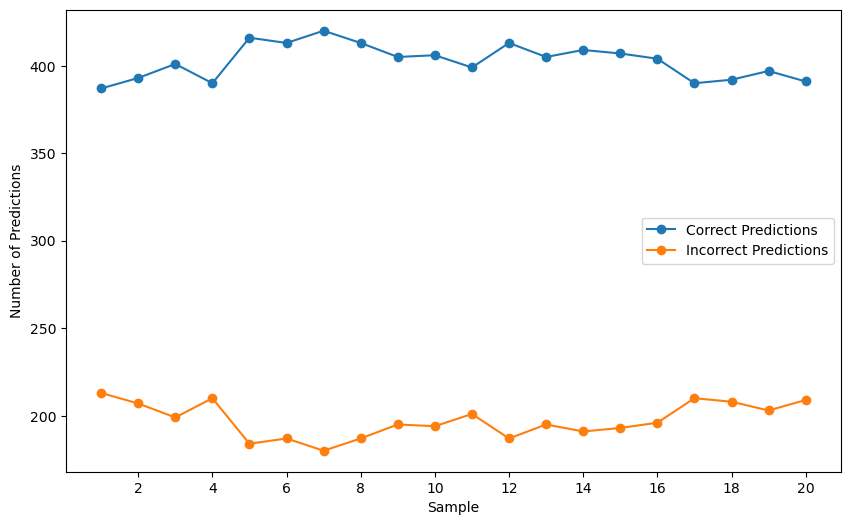

4000  documents deleted
['D:\\Test files\\test_4', 'D:\\Test files\\test_16', 'D:\\Test files\\test_7', 'D:\\Test files\\test_20', 'D:\\Test files\\test_15', 'D:\\Test files\\test_11', 'D:\\Test files\\test_10', 'D:\\Test files\\test_17', 'D:\\Test files\\test_3', 'D:\\Test files\\test_9', 'D:\\Test files\\test_18', 'D:\\Test files\\test_12', 'D:\\Test files\\test_13', 'D:\\Test files\\test_5', 'D:\\Test files\\test_14', 'D:\\Test files\\test_8', 'D:\\Test files\\test_2', 'D:\\Test files\\test_1', 'D:\\Test files\\test_19', 'D:\\Test files\\test_6']
[405, 387, 406, 413, 413, 391, 392, 405, 401, 404, 393, 407, 390, 416, 397, 390, 399, 420, 413, 409]
Fold 5 Results
--------
Correct Predictions: [405, 387, 406, 413, 413, 391, 392, 405, 401, 404, 393, 407, 390, 416, 397, 390, 399, 420, 413, 409]
--------
Incorrect Predictions: [195, 213, 194, 187, 187, 209, 208, 195, 199, 196, 207, 193, 210, 184, 203, 210, 201, 180, 187, 191]
--------
Correct Percentage: [67.5, 64.5, 67.66666666666666, 68.

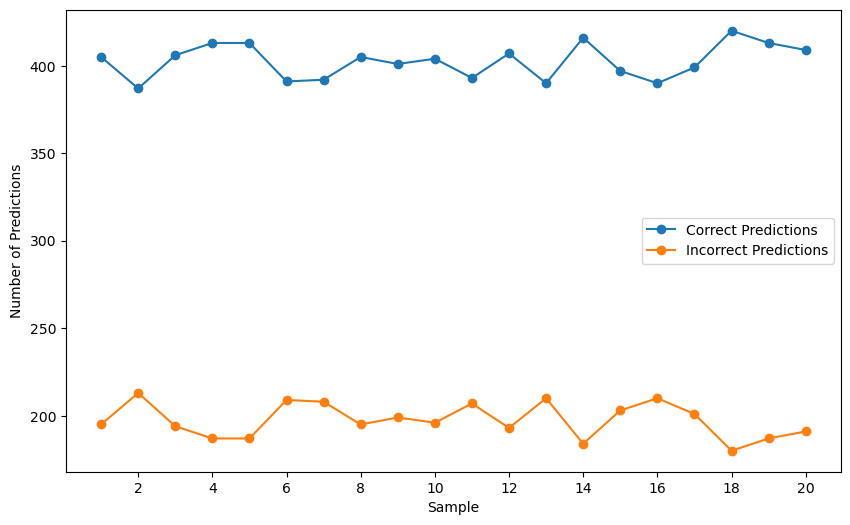

In [17]:
# method 4

# Just Clip & fairface labels #
fld_1_src_folders = random.sample(src_folders, len(src_folders))
fld_2_src_folders = random.sample(src_folders, len(src_folders))
fld_3_src_folders = random.sample(src_folders, len(src_folders))
fld_4_src_folders = random.sample(src_folders, len(src_folders))
fld_5_src_folders = random.sample(src_folders, len(src_folders))

reset_endpoint = "http://localhost:5003/"


# clear_data()
# response = requests.post(reset_endpoint)  
# clip_results_fold_1 = process_images(fld_1_src_folders, endpoint_4)
# print_results(clip_results_fold_1, 1)
# data = prep_to_save(clip_results_fold_1)
# save_data_to_excel(data, "Method_4_fold_1_results.xlsx", "Fold 1 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_2 = process_images(fld_2_src_folders, endpoint_4)
print_results(clip_results_fold_2, 2)
data = prep_to_save(clip_results_fold_2)
save_data_to_excel(data, "Method_4_fold_2_results.xlsx", "Fold 2 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_3 = process_images(fld_3_src_folders, endpoint_4)
print_results(clip_results_fold_3, 3)
data = prep_to_save(clip_results_fold_3)
save_data_to_excel(data, "Method_4_fold_3_results.xlsx", "Fold 3 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_4 = process_images(fld_4_src_folders, endpoint_4)
print_results(clip_results_fold_4, 4)
data = prep_to_save(clip_results_fold_4)
save_data_to_excel(data, "Method_4_fold_4_results.xlsx", "Fold 4 Results")


clear_data()
response = requests.post(reset_endpoint)  
clip_results_fold_5 = process_images(fld_5_src_folders, endpoint_4)
print_results(clip_results_fold_5, 5)
data = prep_to_save(clip_results_fold_5)
save_data_to_excel(data, "Method_4_fold_5_results.xlsx", "Fold 5 Results")
